In [138]:
%matplotlib inline
from Pathopticon_master_v2 import *
import pandas as pd
import pickle
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
from scipy.spatial import distance
import scipy.stats as st
from matplotlib.cm import get_cmap
from matplotlib import gridspec, colors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import random
import functools
from itertools import product
import statsmodels.api as sm
import requests
import json

## Set file paths

In [18]:
proj_path = '/Users/ardahalu/Research/CICS/L1000_project/Pathopticon_all_analyses_v2/'

proj_R_path = proj_path + 'Pathopticon_for_R/'
proj_reducibility_path = proj_path + 'Pathopticon_reducibility/'
proj_invitro_path = proj_path + 'Pathopticon_invitro_data/'


proj_external_data_path = proj_path + 'Pathopticon_external_data/'
proj_intermediary_outputs_path = proj_path + 'Pathopticon_intermediary_outputs/'
proj_output_path = proj_path + 'Pathopticon_all_analyses_outputs/'
proj_benchmark_outputs_path = proj_path + 'Pathopticon_benchmark_outputs/'

input_paths_dict = input_paths(proj_path)

## Import L1000 metadata

In [3]:
L1000_gene_info, L1000_cell_info, L1000_inst_info, L1000_pert_info, L1000_sig_info = import_L1000_metadata(input_paths_dict['L1000_gene_info_path'], 
                                                                                                           input_paths_dict['L1000_cell_info_path'],
                                                                                                           input_paths_dict['L1000_inst_info_path'], 
                                                                                                           input_paths_dict['L1000_pert_info_path'], 
                                                                                                           input_paths_dict['L1000_sig_info_path'])

## Import cell type-specific gene-perturbation networks (QUIZ-C, MODZ, CD)

In [4]:
QUIZC_edgelist_df_dict, QUIZC_nodelist_df_dict, QUIZC_allcells, \
QUIZC_allgenes, QUIZC_alldrugs, QUIZC_allnodes = process_QUIZC_output(input_paths_dict['pos_edges_dict_path'], 
                                                                     input_paths_dict['neg_edges_dict_path'],
                                                                     input_paths_dict['drugs_dict_path'],
                                                                     L1000_gene_info)

MODZ_edgelist_df_dict, MODZ_nodelist_df_dict, MODZ_allcells, \
MODZ_allgenes, MODZ_alldrugs, MODZ_allnodes = import_CD_MODZ_networks(input_paths_dict['MODZ_networks_path'])

CD_edgelist_df_dict, CD_nodelist_df_dict, CD_allcells, \
CD_allgenes, CD_alldrugs, CD_allnodes = import_CD_MODZ_networks(input_paths_dict['CD_networks_path'])

100%|██████████| 71/71 [00:08<00:00,  8.76it/s]


## Import MSigDB, CTD and Tool data for benchmark analyses

In [5]:
cgp_updn, cgp_updn_labels, cgp_updn_allgenes = process_MSigDB_CGP(input_paths_dict['cgp_dir'])

In [6]:
QUIZC_cids_inchi_smiles = pd.read_csv(input_paths_dict['QUIZC_cids_inchi_smiles_path'])
QUIZC_activityStats_nooutliers_df_besttool = pd.read_csv(input_paths_dict['tool_path'])

In [7]:
CTD_mRNA_up_final, CTD_mRNA_dn_final = process_CTD_data(input_paths_dict['CTD_path'], input_paths_dict['CTD2CID_path'], 
                                                        QUIZC_cids_inchi_smiles, L1000_pert_info)

## Calculate positives for the benchmark genesets via the directional enrichment approach

In [8]:
calculate_FE_pvals(cgp_updn, cgp_updn_labels, CTD_mRNA_up_final, CTD_mRNA_dn_final, QUIZC_allgenes, QUIZC_alldrugs, 
                       'UP', 'UP', proj_intermediary_outputs_path)

100%|██████████| 1058/1058 [00:01<00:00, 761.42it/s]


In [9]:
calculate_FE_pvals(cgp_updn, cgp_updn_labels, CTD_mRNA_up_final, CTD_mRNA_dn_final, QUIZC_allgenes, QUIZC_alldrugs, 
                       'UP', 'DN', proj_intermediary_outputs_path)

100%|██████████| 1058/1058 [00:01<00:00, 957.17it/s]


In [10]:
calculate_FE_pvals(cgp_updn, cgp_updn_labels, CTD_mRNA_up_final, CTD_mRNA_dn_final, QUIZC_allgenes, QUIZC_alldrugs, 
                       'DN', 'UP', proj_intermediary_outputs_path)

100%|██████████| 1058/1058 [00:01<00:00, 887.26it/s]


In [11]:
calculate_FE_pvals(cgp_updn, cgp_updn_labels, CTD_mRNA_up_final, CTD_mRNA_dn_final, QUIZC_allgenes, QUIZC_alldrugs, 
                       'DN', 'DN', proj_intermediary_outputs_path)

100%|██████████| 1058/1058 [00:01<00:00, 987.58it/s]


## Intrinsic benchmark using MSigDB gene sets (Fig. 6A)

In [12]:
run_benchmark_ALLcellsCTD_FE(proj_path,
                             benchmark_path=proj_path + 'Pathopticon_benchmark_outputs/', 
                             method_name='QUIZ-C',
                             PACOS_Spearman_threshold=10, r=2.0, Nrand=100, auc_params={'auc_threshold':5, 'binsize':100}, 
                             models=['PACOS_Spearman_rho', 'PACOS_Spearman_rho_reverse', 'PACOS_tool_combined', 'PACOS_tool_combined_reverse'])


Loading input data...


100%|██████████| 1058/1058 [00:02<00:00, 440.64it/s]

Processing QUIZ-C networks...



100%|██████████| 71/71 [00:07<00:00,  9.70it/s]


Calculating PCPs for all perturbations...


100%|██████████| 18457/18457 [8:29:32<00:00,  1.66s/it]  


Calculating PCPs for all benchmark gene sets...


100%|██████████| 1058/1058 [00:48<00:00, 21.70it/s]

Running the benchmark...



  0%|          | 0/73 [00:00<?, ?it/s]/Users/ardahalu/anaconda3/envs/py3_main/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/ardahalu/anaconda3/envs/py3_main/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/ardahalu/anaconda3/envs/py3_main/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/ardahalu/anaconda3/envs/py3_main/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/ardahalu/anaconda3/envs/py3_main/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
100%|██████████| 73/73 [10:

Benchmark complete.


In [13]:
run_benchmark_ALLcellsCTD_FE(proj_path,
                             benchmark_path=proj_path + 'Pathopticon_benchmark_outputs/', 
                             method_name='MODZ',
                             PACOS_Spearman_threshold=10, r=2.0, Nrand=100, auc_params={'auc_threshold':5, 'binsize':100}, 
                             models=['PACOS_Spearman_rho', 'PACOS_Spearman_rho_reverse', 'PACOS_tool_combined', 'PACOS_tool_combined_reverse'])


Loading input data...


100%|██████████| 1058/1058 [00:02<00:00, 447.19it/s]

Importing gene-perturbation networks...


Calculating PCPs for all perturbations...


100%|██████████| 3565/3565 [58:42<00:00,  1.01it/s]  


Calculating PCPs for all benchmark gene sets...


100%|██████████| 1058/1058 [00:51<00:00, 20.45it/s]

Running the benchmark...



100%|██████████| 73/73 [2:17:08<00:00, 112.72s/it]  

Benchmark complete.


In [14]:
run_benchmark_ALLcellsCTD_FE(proj_path,
                             benchmark_path=proj_path + 'Pathopticon_benchmark_outputs/', 
                             method_name='CD',
                             PACOS_Spearman_threshold=10, r=2.0, Nrand=100, auc_params={'auc_threshold':5, 'binsize':100}, 
                             models=['PACOS_Spearman_rho', 'PACOS_Spearman_rho_reverse', 'PACOS_tool_combined', 'PACOS_tool_combined_reverse'])


Loading input data...


100%|██████████| 1058/1058 [00:02<00:00, 454.71it/s]

Importing gene-perturbation networks...


Calculating PCPs for all perturbations...


100%|██████████| 5331/5331 [3:20:10<00:00,  2.25s/it]  


Calculating PCPs for all benchmark gene sets...


100%|██████████| 1058/1058 [00:50<00:00, 21.12it/s]

Running the benchmark...



100%|██████████| 73/73 [7:54:46<00:00, 390.22s/it]  

Benchmark complete.


In [16]:
geneset_pert_iname_dict_fwd = get_MSigDB_geneset_targets_CTD_FE(cgp_updn, cgp_updn_labels, 
                                                                proj_intermediary_outputs_path + 'FE_table_adj_pvals_UP_UP.csv', 
                                                                proj_intermediary_outputs_path + 'FE_table_adj_pvals_DN_DN.csv')

100%|██████████| 1058/1058 [00:02<00:00, 442.06it/s]


In [19]:
tool_scores_df = QUIZC_activityStats_nooutliers_df_besttool[['Pert_iname', 'tool score scaled']]
tool_scores_sorted_df = QUIZC_activityStats_nooutliers_df_besttool.sort_values('tool score scaled', ascending=False)
tool_scores_sorted_df_uniq = tool_scores_df.sort_values('tool score scaled', ascending=False).drop_duplicates('Pert_iname')

   
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})

tool_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=['AUROC', 'AUPRC'])

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):

    tool_auroc_df.at[geneset_name, 'AUROC'], tool_auroc_df.at[geneset_name, 'AUPRC'] = AUROC_AUPRC(tool_scores_sorted_df_uniq['Pert_iname'].values, 
                                                                                             geneset_pert_iname_dict_fwd[geneset_name], 
                                                                                             auc_threshold=5, binsize=1)

tool_auroc_df.to_csv(proj_benchmark_outputs_path + 'tool_auroc_df.csv')

100%|██████████| 73/73 [00:10<00:00,  6.89it/s]


In [20]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})

alldrugs_sorted = QUIZC_alldrugs['Pert_iname'].values
Nrand = 100
cellAgnosRand_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'], columns=np.arange(Nrand))
cellAgnosRand_auprc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'], columns=np.arange(Nrand))

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):

    for n_rand in np.arange(Nrand):
        
        np.random.shuffle(alldrugs_sorted)

        (cellAgnosRand_auroc_df.at[geneset_name, n_rand], 
         cellAgnosRand_auprc_df.at[geneset_name, n_rand]) = AUROC_AUPRC(alldrugs_sorted, geneset_pert_iname_dict_fwd[geneset_name], 
                                                                        auc_threshold=5, binsize=100)
                  
cellAgnosRand_auroc_df.to_csv(proj_benchmark_outputs_path + 'cellAgnosRand_auroc_df.csv')
cellAgnosRand_auprc_df.to_csv(proj_benchmark_outputs_path + 'cellAgnosRand_auprc_df.csv')

100%|██████████| 73/73 [12:01<00:00,  9.88s/it]


In [21]:
models=['PACOS_Spearman_rho', 'PACOS_Spearman_rho_reverse', 'PACOS_tool_combined', 'PACOS_tool_combined_reverse']
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})
method_names = ['QUIZ-C', 'MODZ', 'CD']
r = 2

all_aurocs_concat_df = pd.DataFrame(columns=['Model', 'AUROC'])

for m in tqdm(models, position=0, leave=True):

    for method_name in method_names:

        temp_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=['AUROC'])
        
        for geneset_name in benchmark_genesets['Geneset_name'].to_numpy():

            temp_nested = pd.read_csv(proj_benchmark_outputs_path + 'Nested_%s_%s_r%s.csv' % (method_name, geneset_name, int(r)))
            temp_auroc_df.at[geneset_name, 'AUROC'] = temp_nested['%s_AUROC' % m].max()
          
        temp_auroc_df['Model'] = '%s_%s' % (method_name, m)    
                               
        all_aurocs_concat_df = pd.concat([all_aurocs_concat_df, temp_auroc_df])
        
tool_auroc_df = pd.read_csv(proj_benchmark_outputs_path + 'tool_auroc_df.csv', index_col=0)
tool_auroc_df['Model']='Tool_only'
all_aurocs_concat_df = pd.concat([all_aurocs_concat_df, tool_auroc_df[['Model', 'AUROC']]])

cellAgnosRand_auroc_df = pd.read_csv(proj_benchmark_outputs_path + 'cellAgnosRand_auroc_df.csv', index_col=0)
cellAgnosRand_auroc_df = pd.DataFrame(cellAgnosRand_auroc_df.T.max()).rename(columns={0: 'AUROC'})
cellAgnosRand_auroc_df['Model']='Random'
all_aurocs_concat_df = pd.concat([all_aurocs_concat_df, cellAgnosRand_auroc_df[['Model', 'AUROC']]])

100%|██████████| 4/4 [03:33<00:00, 53.38s/it]


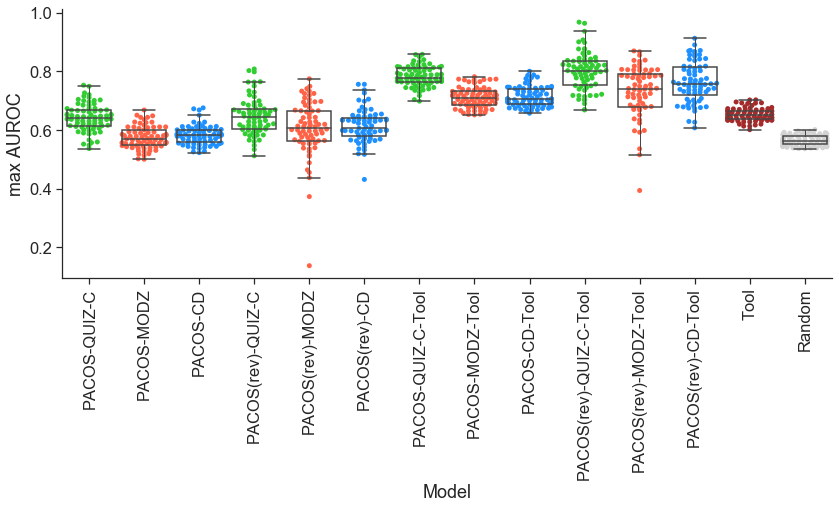

In [22]:
cols = ['limegreen', 'tomato', 'dodgerblue', 'limegreen', 'tomato', 'dodgerblue', 'limegreen', 'tomato', 'dodgerblue', 
        'limegreen', 'tomato', 'dodgerblue', 'brown', 'lightgrey']
fig = plt.figure()
fig.set_size_inches(12, 9)
sns.set(font_scale=1.5)
with sns.axes_style('ticks'):
    # plot swarmplot
    ax = sns.swarmplot(x='Model', y='AUROC', data=all_aurocs_concat_df, zorder=0, palette=cols, alpha=1.0)
    # plot boxplot
    sns.boxplot(x='Model', y='AUROC', data=all_aurocs_concat_df, showcaps=True, notch=False, boxprops={'facecolor':'None'}, showfliers=False, 
                whiskerprops={'linewidth':1}, ax=ax)
    plt.xticks(rotation=90)
    #plt.ylim(0.40, 0.90)
    plt.tight_layout()
    plt.xticks(np.arange(0, 14),  ['PACOS-QUIZ-C', 'PACOS-MODZ', 'PACOS-CD', 'PACOS(rev)-QUIZ-C', 'PACOS(rev)-MODZ', 'PACOS(rev)-CD', 
                                  'PACOS-QUIZ-C-Tool', 'PACOS-MODZ-Tool', 'PACOS-CD-Tool', 
                                  'PACOS(rev)-QUIZ-C-Tool', 'PACOS(rev)-MODZ-Tool', 'PACOS(rev)-CD-Tool',
                                   'Tool', 'Random'])
    sns.despine()
    plt.ylabel('max AUROC')
    plt.savefig(proj_output_path + 'master_AUROC_comparisons_100cutoff.pdf', format='pdf')
    plt.show()

In [115]:
print(np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho']['AUROC']))
print(np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho_reverse']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho_reverse']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho_reverse']['AUROC']))
print(np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_tool_combined']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_tool_combined']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_tool_combined']['AUROC']))
print(np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_tool_combined_reverse']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_tool_combined_reverse']['AUROC']),
      np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_tool_combined_reverse']['AUROC']))
print(np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print(np.mean(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))

0.6421530221304333 0.5744853995924032 0.5825604808546818
0.6461105893642246 0.6057863091094785 0.6139881353564695
0.7829145371621721 0.7113037168919157 0.7143319754157983
0.7996727454845023 0.7307495690876826 0.7634041109528105
0.6525000305071499
0.5646548635041652


In [116]:
print('Comparison of QUIZ-C with MODZ and CD:')
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho_reverse']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho_reverse']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_tool_combined']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_tool_combined']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_tool_combined']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_tool_combined']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_tool_combined_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_tool_combined_reverse']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_tool_combined_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_tool_combined_reverse']['AUROC']))
print('Comparison of QUIZ-C/MODZ/CD with random:')
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))
print('Comparison of QUIZ-C/MODZ/CD with tool score:')
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'QUIZ-C_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'MODZ_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'CD_PACOS_Spearman_rho_reverse']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC']))
print('Comparison of tool score with random:')
print(st.wilcoxon(all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Tool_only']['AUROC'], 
                  all_aurocs_concat_df[all_aurocs_concat_df['Model'] == 'Random']['AUROC']))

Comparison of QUIZ-C with MODZ and CD:
WilcoxonResult(statistic=80.0, pvalue=2.855773167923776e-12)
WilcoxonResult(statistic=47.0, pvalue=7.718454737625407e-13)
WilcoxonResult(statistic=698.0, pvalue=0.00033430522873743824)
WilcoxonResult(statistic=629.0, pvalue=7.293985332421695e-05)
WilcoxonResult(statistic=12.0, pvalue=1.8601788394335163e-13)
WilcoxonResult(statistic=3.0, pvalue=1.282601266264791e-13)
WilcoxonResult(statistic=84.0, pvalue=3.339195865052206e-12)
WilcoxonResult(statistic=393.0, pvalue=1.4102358963893887e-07)
Comparison of QUIZ-C/MODZ/CD with random:
WilcoxonResult(statistic=23.0, pvalue=2.9206444780725296e-13)
WilcoxonResult(statistic=61.0, pvalue=1.3498843734051047e-12)
WilcoxonResult(statistic=944.0, pvalue=0.02543333762163192)
WilcoxonResult(statistic=554.0, pvalue=1.1933273848290995e-05)
WilcoxonResult(statistic=589.0, pvalue=2.834275531181599e-05)
WilcoxonResult(statistic=277.0, pvalue=3.5993552947425976e-09)
Comparison of QUIZ-C/MODZ/CD with tool score:
Wilcoxon

## Sensitivity analysis for combined ratio r (Supp. Fig. 18A-B)

In [118]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})

geneset_pert_iname_dict_fwd = get_MSigDB_geneset_targets_CTD_FE(cgp_updn, cgp_updn_labels, 
                                                                proj_intermediary_outputs_path + 'FE_table_adj_pvals_UP_UP.csv', 
                                                                proj_intermediary_outputs_path + 'FE_table_adj_pvals_DN_DN.csv')
geneset_pert_iname_dict_rev = get_MSigDB_geneset_targets_CTD_FE(cgp_updn, cgp_updn_labels, 
                                                                proj_intermediary_outputs_path + 'FE_table_adj_pvals_UP_DN.csv', 
                                                                proj_intermediary_outputs_path + 'FE_table_adj_pvals_DN_UP.csv')

models = ['PACOS_tool_combined_var', 'PACOS_tool_combined_reverse_var']
Nir = 101
method_name = 'QUIZ-C'
median_AUROC_arr = {}
median_AUPRC_arr = {}
div_arr = {}

for m in models:
    
    temp_median_AUROC_arr = np.zeros(Nir)
    temp_median_AUPRC_arr = np.zeros(Nir)
    temp_div_arr = np.zeros(Nir)    
    
    for ir, r in enumerate(tqdm(np.linspace(0, 6, Nir), position=0, leave=True)):
        
        temp_geneset_median_AUROC_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=['AUROC'])
        temp_geneset_median_AUPRC_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=['AUPRC'])
        QUIZC_top50_alldrugs = set()
        
        for geneset_name in benchmark_genesets['Geneset_name'].to_numpy():
                       
            temp_pacos_tool_merged_df = pd.read_csv(proj_benchmark_outputs_path + '%s_%s_r2.csv' % (method_name, geneset_name))

            temp_pacos_tool_merged_df['PACOS_tool_combined_var'] = (r*temp_pacos_tool_merged_df['PACOS_Spearman_rho'] + 
                                                                    temp_pacos_tool_merged_df['tool_score_imputed']) / (r + 1.0)
            temp_pacos_tool_merged_df['PACOS_tool_combined_reverse_var'] = (-1.0*r*temp_pacos_tool_merged_df['PACOS_Spearman_rho'] + 
                                                                            temp_pacos_tool_merged_df['tool_score_imputed']) / (r + 1.0)

            model_sorted = temp_pacos_tool_merged_df.sort_values(m, ascending=False)    
            model_sorted_uniq = model_sorted['Pert_iname'].drop_duplicates()  
                       
            QUIZC_top50_alldrugs.update(set(temp_pacos_tool_merged_df.sort_values(m, ascending=False)[0:50]['Pert_iname']))
            
            if 'reverse' in m:
                (temp_geneset_median_AUROC_df.at[geneset_name, 'AUROC'], 
                 temp_geneset_median_AUPRC_df.at[geneset_name, 'AUPRC']) = AUROC_AUPRC(model_sorted_uniq, 
                                                                                       geneset_pert_iname_dict_rev[geneset_name], 
                                                                                       auc_threshold=5, binsize=10)
            else:
                (temp_geneset_median_AUROC_df.at[geneset_name, 'AUROC'], 
                 temp_geneset_median_AUPRC_df.at[geneset_name, 'AUPRC']) = AUROC_AUPRC(model_sorted_uniq, 
                                                                                       geneset_pert_iname_dict_fwd[geneset_name], 
                                                                                       auc_threshold=5, binsize=10)              
                  
        temp_div_arr[ir] = len(QUIZC_top50_alldrugs)           
        temp_median_AUROC_arr[ir] = temp_geneset_median_AUROC_df['AUROC'].median()
        temp_median_AUPRC_arr[ir] = temp_geneset_median_AUPRC_df['AUPRC'].median()
    
    div_arr[m] = temp_div_arr
    median_AUROC_arr[m] = temp_median_AUROC_arr
    median_AUPRC_arr[m] = temp_median_AUPRC_arr
    
with open(proj_intermediary_outputs_path +'%s_div_arr.pickle' % method_name, 'wb') as fp:
    pickle.dump(div_arr, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open(proj_intermediary_outputs_path +'%s_median_AUROC_arr.pickle' % method_name, 'wb') as fp:
    pickle.dump(median_AUROC_arr, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open(proj_intermediary_outputs_path +'%s_median_AUPRC_arr.pickle' % method_name, 'wb') as fp:
    pickle.dump(median_AUPRC_arr, fp, protocol=pickle.HIGHEST_PROTOCOL)

 20%|█▉        | 20/101 [57:13<3:52:58, 172.58s/it]

KeyboardInterrupt: 

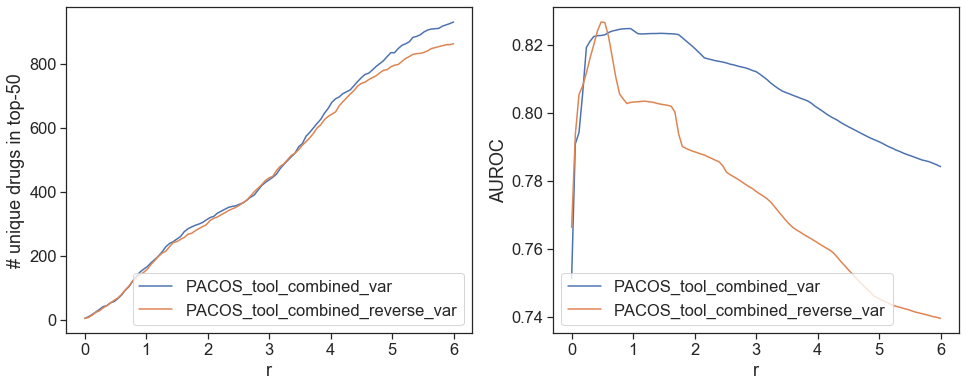

In [23]:
fig = plt.figure()
fig.set_size_inches(16, 6)
sns.set(font_scale=1.5)
with sns.axes_style('ticks'):
    plt.subplot(1, 2, 1)
    for m in div_arr.keys():
        plt.plot(np.linspace(0, 6, Nir), div_arr[m], label=m)
    plt.xlabel('r')
    plt.legend()
    plt.ylabel('# unique drugs in top-50')
    
    plt.subplot(1, 2, 2)
    for m in median_AUROC_arr.keys():
        plt.plot(np.linspace(0, 6, Nir), median_AUROC_arr[m], label=m)
    plt.xlabel('r')
    plt.legend()
    plt.ylabel('AUROC')
    
    plt.savefig(proj_output_path + 'QUIZ-C_r_sensitivity_top50_AUROC.pdf', format='pdf')    
    plt.show()

## AUROCs of benchmark gene sets (Supp. Figs. 17A-B; 19A-B)

100%|██████████| 73/73 [01:07<00:00,  1.07it/s]


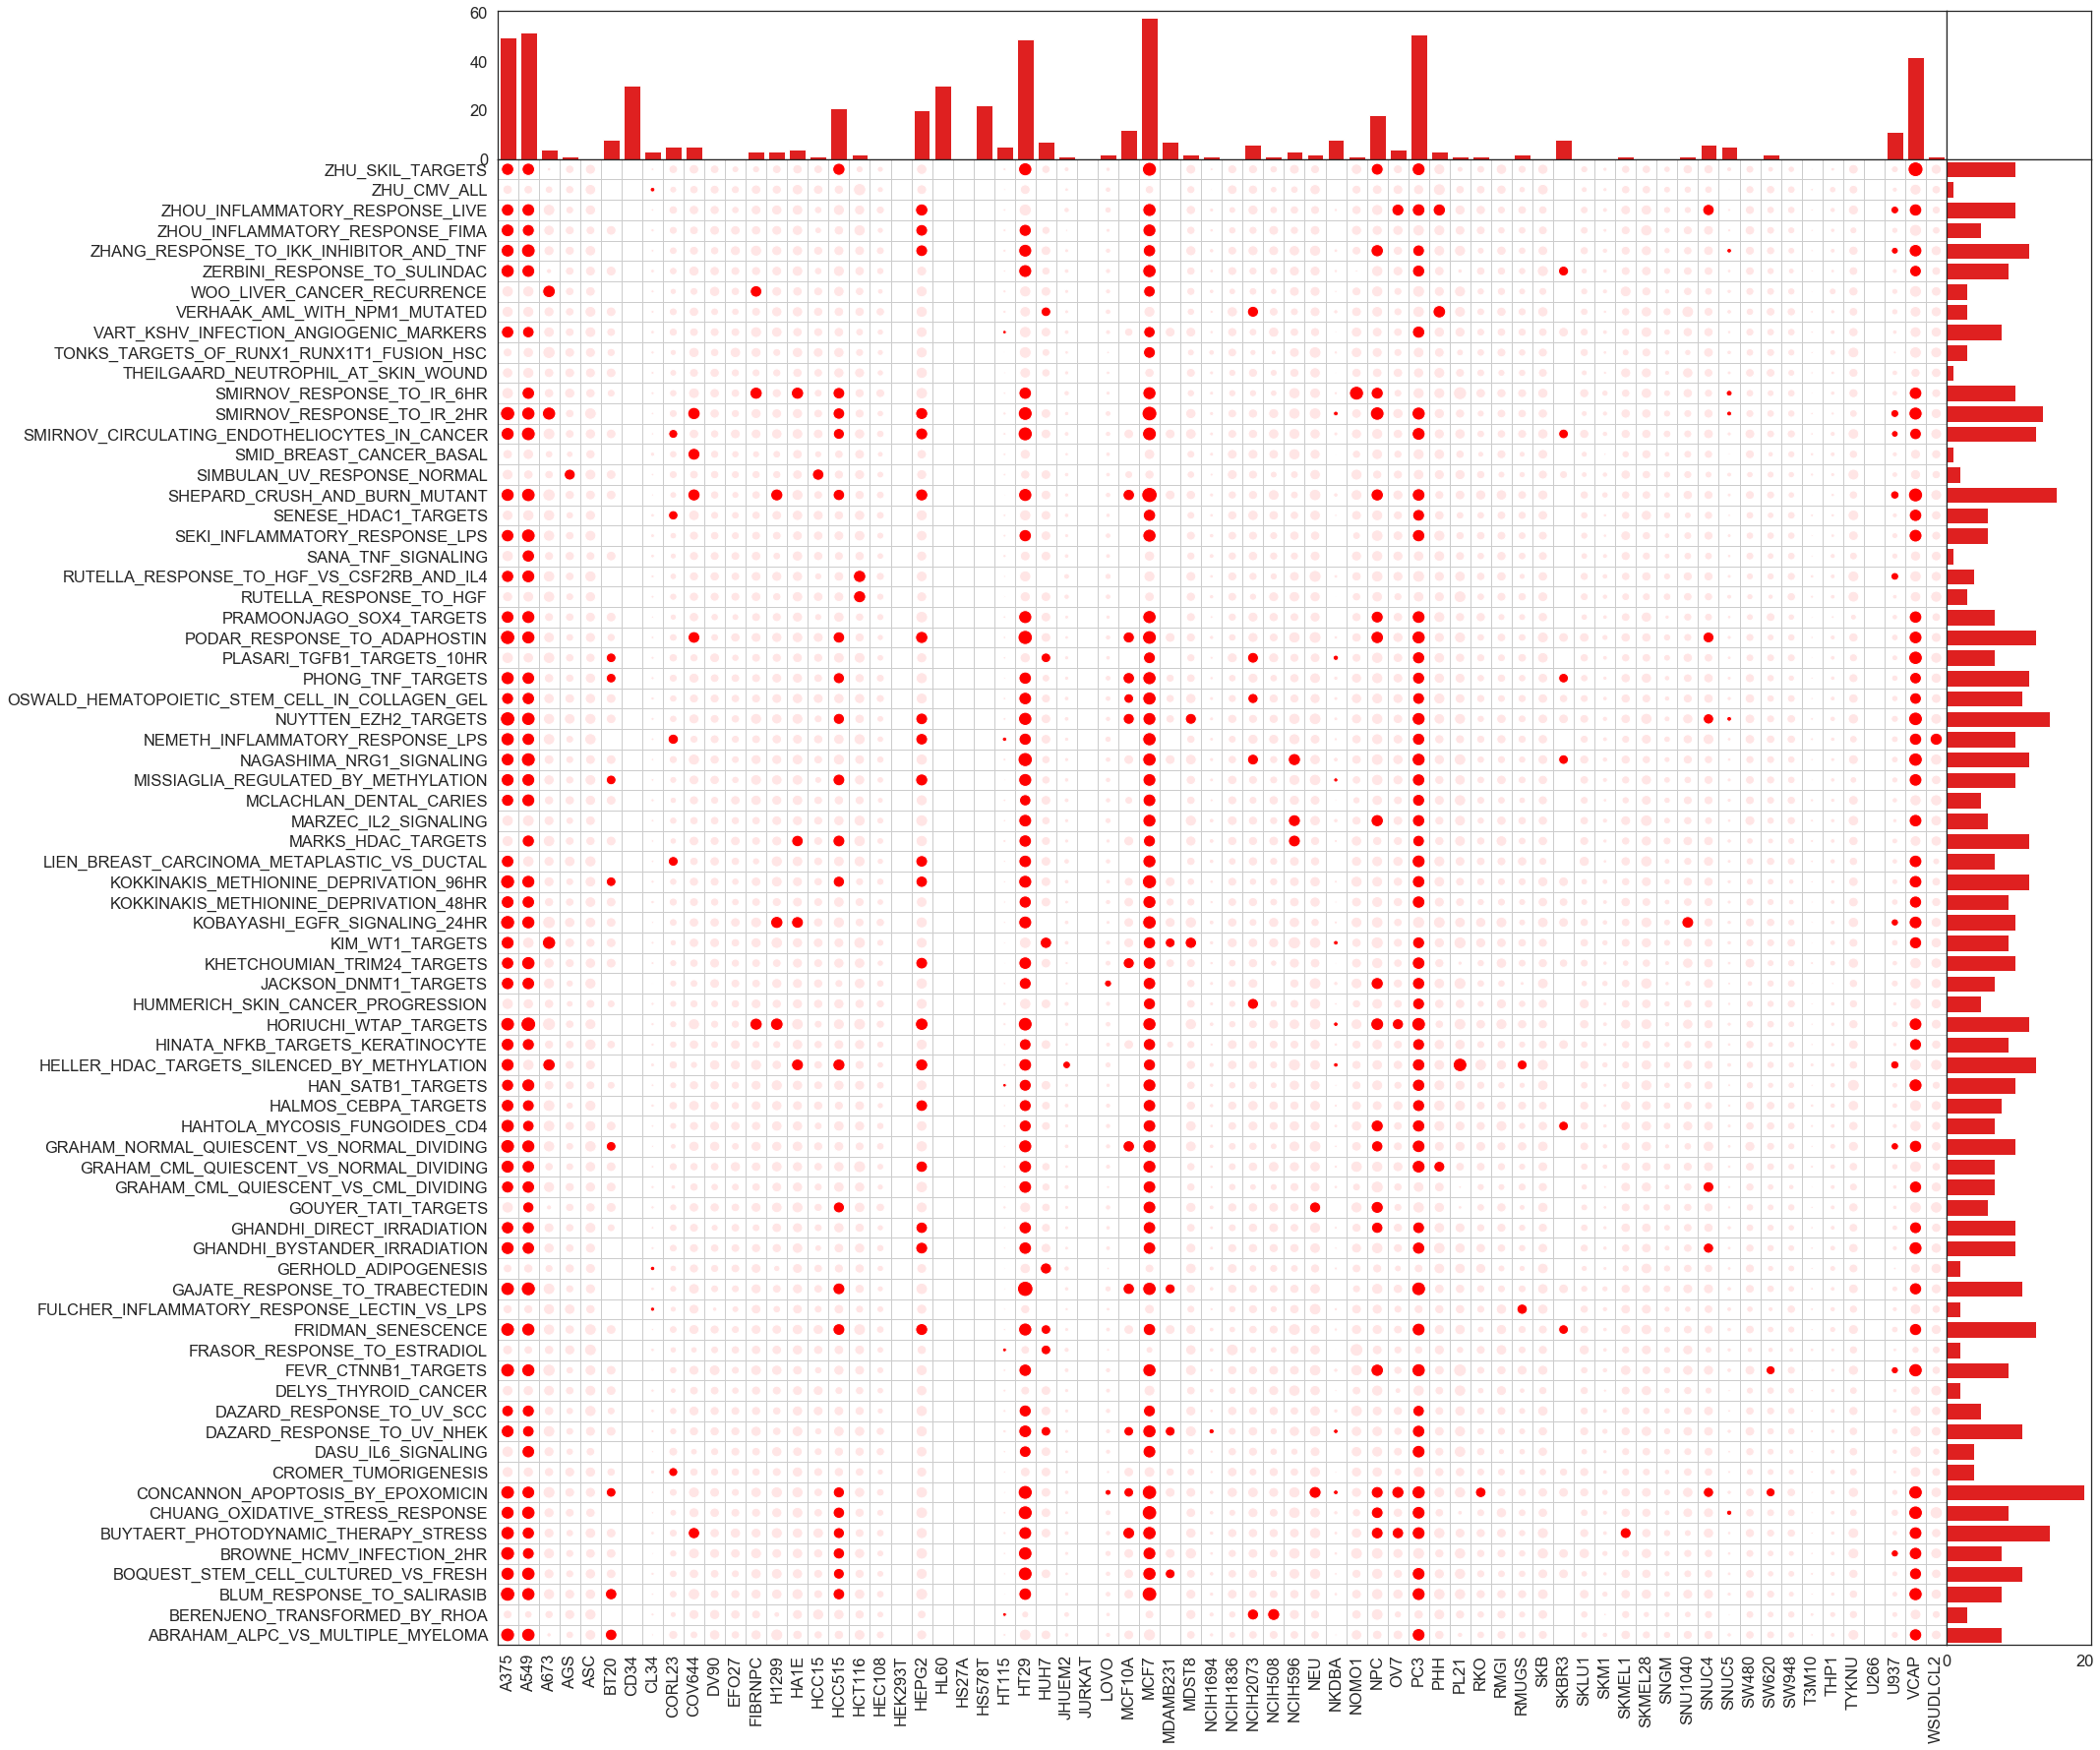

70 50
71.42857142857143


In [121]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})
method_name = 'QUIZ-C'
m = 'PACOS_Spearman_rho'

temp_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
temp_auroc_emp_pval_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
cols_df = pd.DataFrame(0.0, index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):

    temp_nested = pd.read_csv(proj_benchmark_outputs_path + 'Nested_%s_%s_r2.csv' % (method_name, geneset_name))
    for c in temp_nested['Cell_type'].unique():
        temp_auroc_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC' % m].unique()[0]
        temp_auroc_emp_pval_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC_emp_pval' % m].unique()[0]
        if temp_auroc_emp_pval_df.at[geneset_name, c] < 0.05: 
            cols_df.at[geneset_name, c] = 1.0

temp_auroc_df_nonan = temp_auroc_df.fillna(0.0)

N = temp_auroc_df.shape[0]
M = temp_auroc_df.shape[1]
ylabels = temp_auroc_df.index.values
xlabels = temp_auroc_df.columns.values

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = temp_auroc_df_nonan.values
c = cols_df.values # color could be based on whether the cell type significant or not based on the randomizations
my_cmap = sns.light_palette('Red', as_cmap=True)

sns.set(font_scale=1.5)
with sns.axes_style("white"):
    
    f, axs = plt.subplots(2, 2, figsize=(30, 25), gridspec_kw=dict(height_ratios=[0.1, 1], width_ratios=[1, 0.1], hspace=0, wspace=0))
    sns.barplot(x=cols_df.columns, y=cols_df.sum(axis=0), ax=axs[0, 0], color='red')
    plt.setp(axs[0, 0].get_xticklabels(), visible=False)
    
    plt.setp(axs[0, 1].get_xticklabels(), visible=False)
    plt.setp(axs[0, 1].get_yticklabels(), visible=False)

    R = s/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap=my_cmap)
    axs[1, 0].add_collection(col)

    axs[1, 0].set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    axs[1, 0].set_xticks(np.arange(M+1)-0.5, minor=True)
    axs[1, 0].set_yticks(np.arange(N+1)-0.5, minor=True)
    axs[1, 0].set_xticklabels(labels=xlabels, rotation=90)
    axs[1, 0].grid(which='minor')
    

    sns.barplot(x=cols_df.sort_index(ascending=False).sum(axis=1), y=cols_df.sort_index(ascending=False).index, ax=axs[1, 1], color='red')
    plt.setp(axs[1, 1].get_yticklabels(), visible=False)

    #fig.colorbar(col)
    #sns.despine()
    plt.tight_layout()
    plt.savefig(proj_output_path + 'auroc_circle_heatmap_%s_%s.pdf' % (method_name, m), format='pdf')
    plt.show()
    
print(len(cols_df.columns), len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]))
print(len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]) / len(cols_df.columns) * 100)

100%|██████████| 73/73 [01:09<00:00,  1.05it/s]


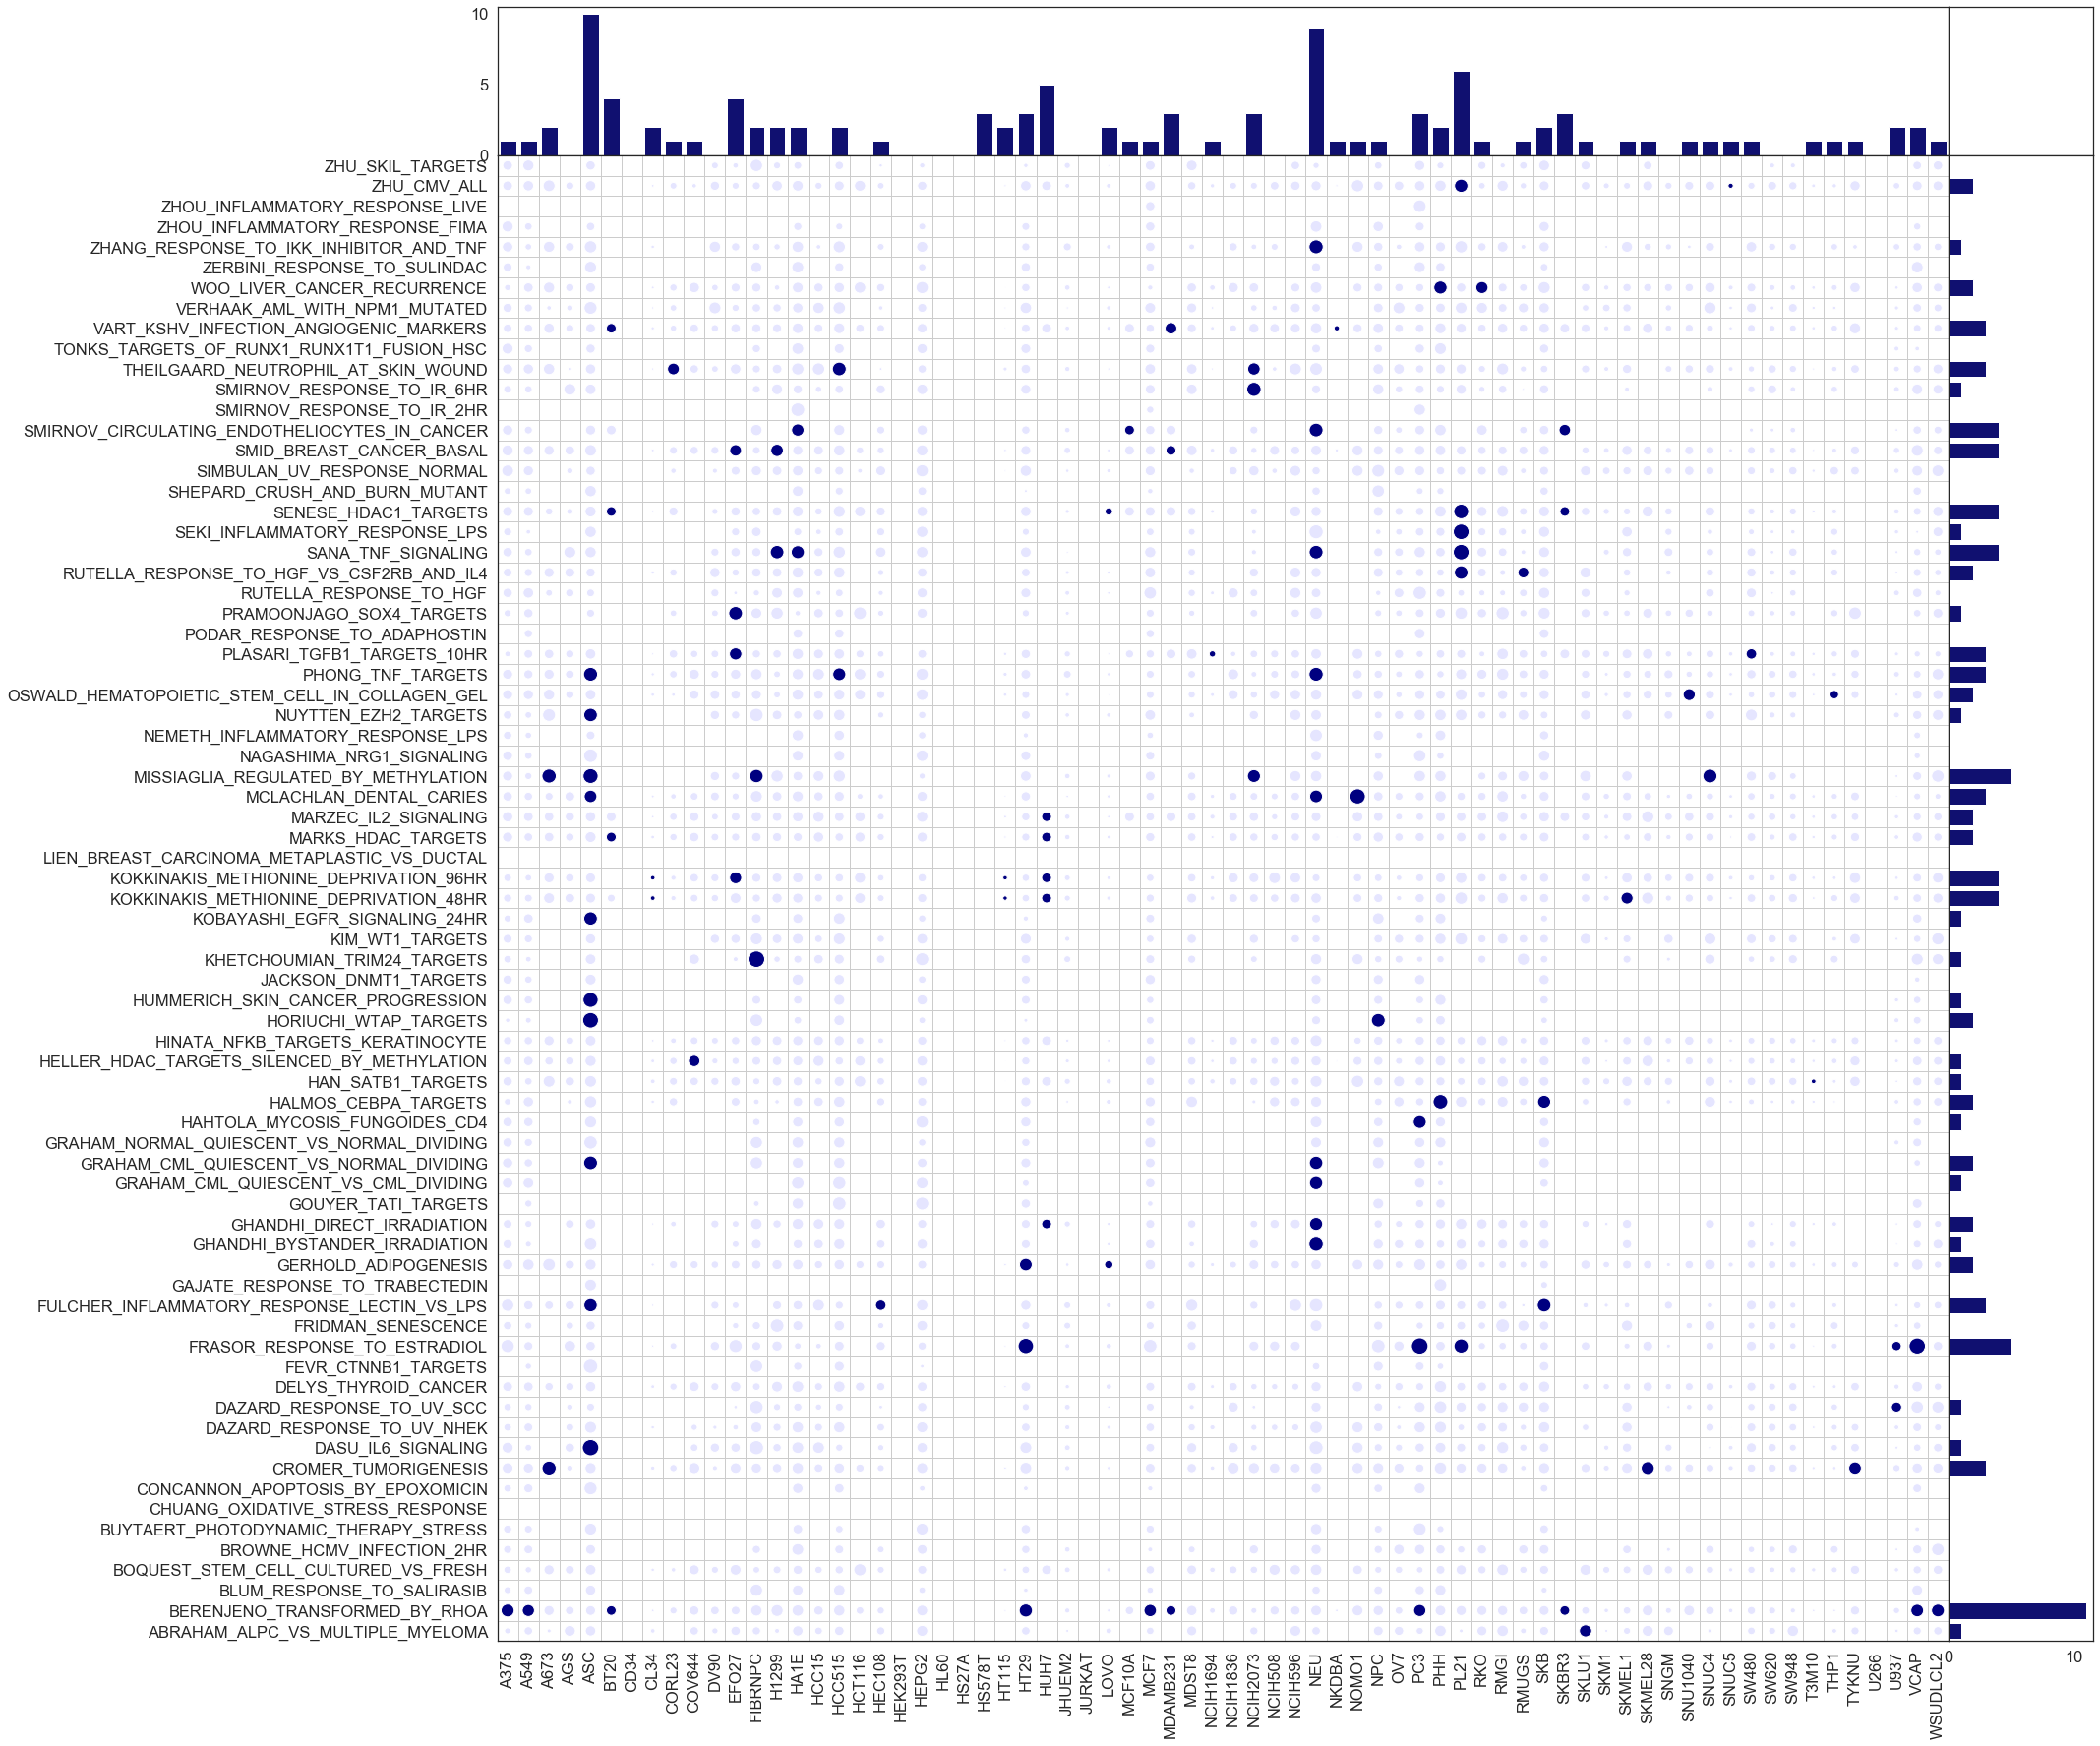

70 48
68.57142857142857


In [122]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})
method_name = 'QUIZ-C'
m = 'PACOS_Spearman_rho_reverse'

temp_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
temp_auroc_emp_pval_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
cols_df = pd.DataFrame(0.0, index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):

    temp_nested = pd.read_csv(proj_benchmark_outputs_path + 'Nested_%s_%s_r2.csv' % (method_name, geneset_name))
    for c in temp_nested['Cell_type'].unique():
        temp_auroc_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC' % m].unique()[0]
        temp_auroc_emp_pval_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC_emp_pval' % m].unique()[0]
        if temp_auroc_emp_pval_df.at[geneset_name, c] < 0.05: 
            cols_df.at[geneset_name, c] = 1.0

temp_auroc_df_nonan = temp_auroc_df.fillna(0.0)

N = temp_auroc_df.shape[0]
M = temp_auroc_df.shape[1]
ylabels = temp_auroc_df.index.values
xlabels = temp_auroc_df.columns.values

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = temp_auroc_df_nonan.values
c = cols_df.values # color could be based on whether the cell type significant or not based on the randomizations
my_cmap = sns.light_palette('Navy', as_cmap=True)

sns.set(font_scale=1.5)
with sns.axes_style("white"):
    
    f, axs = plt.subplots(2, 2, figsize=(30, 25), gridspec_kw=dict(height_ratios=[0.1, 1], width_ratios=[1, 0.1], hspace=0, wspace=0))
    sns.barplot(x=cols_df.columns, y=cols_df.sum(axis=0), ax=axs[0, 0], color='Navy')
    plt.setp(axs[0, 0].get_xticklabels(), visible=False)
    
    plt.setp(axs[0, 1].get_xticklabels(), visible=False)
    plt.setp(axs[0, 1].get_yticklabels(), visible=False)

    R = s/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap=my_cmap)
    axs[1, 0].add_collection(col)

    axs[1, 0].set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    axs[1, 0].set_xticks(np.arange(M+1)-0.5, minor=True)
    axs[1, 0].set_yticks(np.arange(N+1)-0.5, minor=True)
    axs[1, 0].set_xticklabels(labels=xlabels, rotation=90)
    axs[1, 0].grid(which='minor')
    

    sns.barplot(x=cols_df.sort_index(ascending=False).sum(axis=1), y=cols_df.sort_index(ascending=False).index, ax=axs[1, 1], color='Navy')
    plt.setp(axs[1, 1].get_yticklabels(), visible=False)

    #fig.colorbar(col)
    #sns.despine()
    plt.tight_layout()
    plt.savefig(proj_output_path + 'auroc_circle_heatmap_%s_%s.pdf' % (method_name, m), format='pdf')
    plt.show()
    
print(len(cols_df.columns), len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]))
print(len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]) / len(cols_df.columns) * 100)

100%|██████████| 73/73 [01:09<00:00,  1.05it/s]


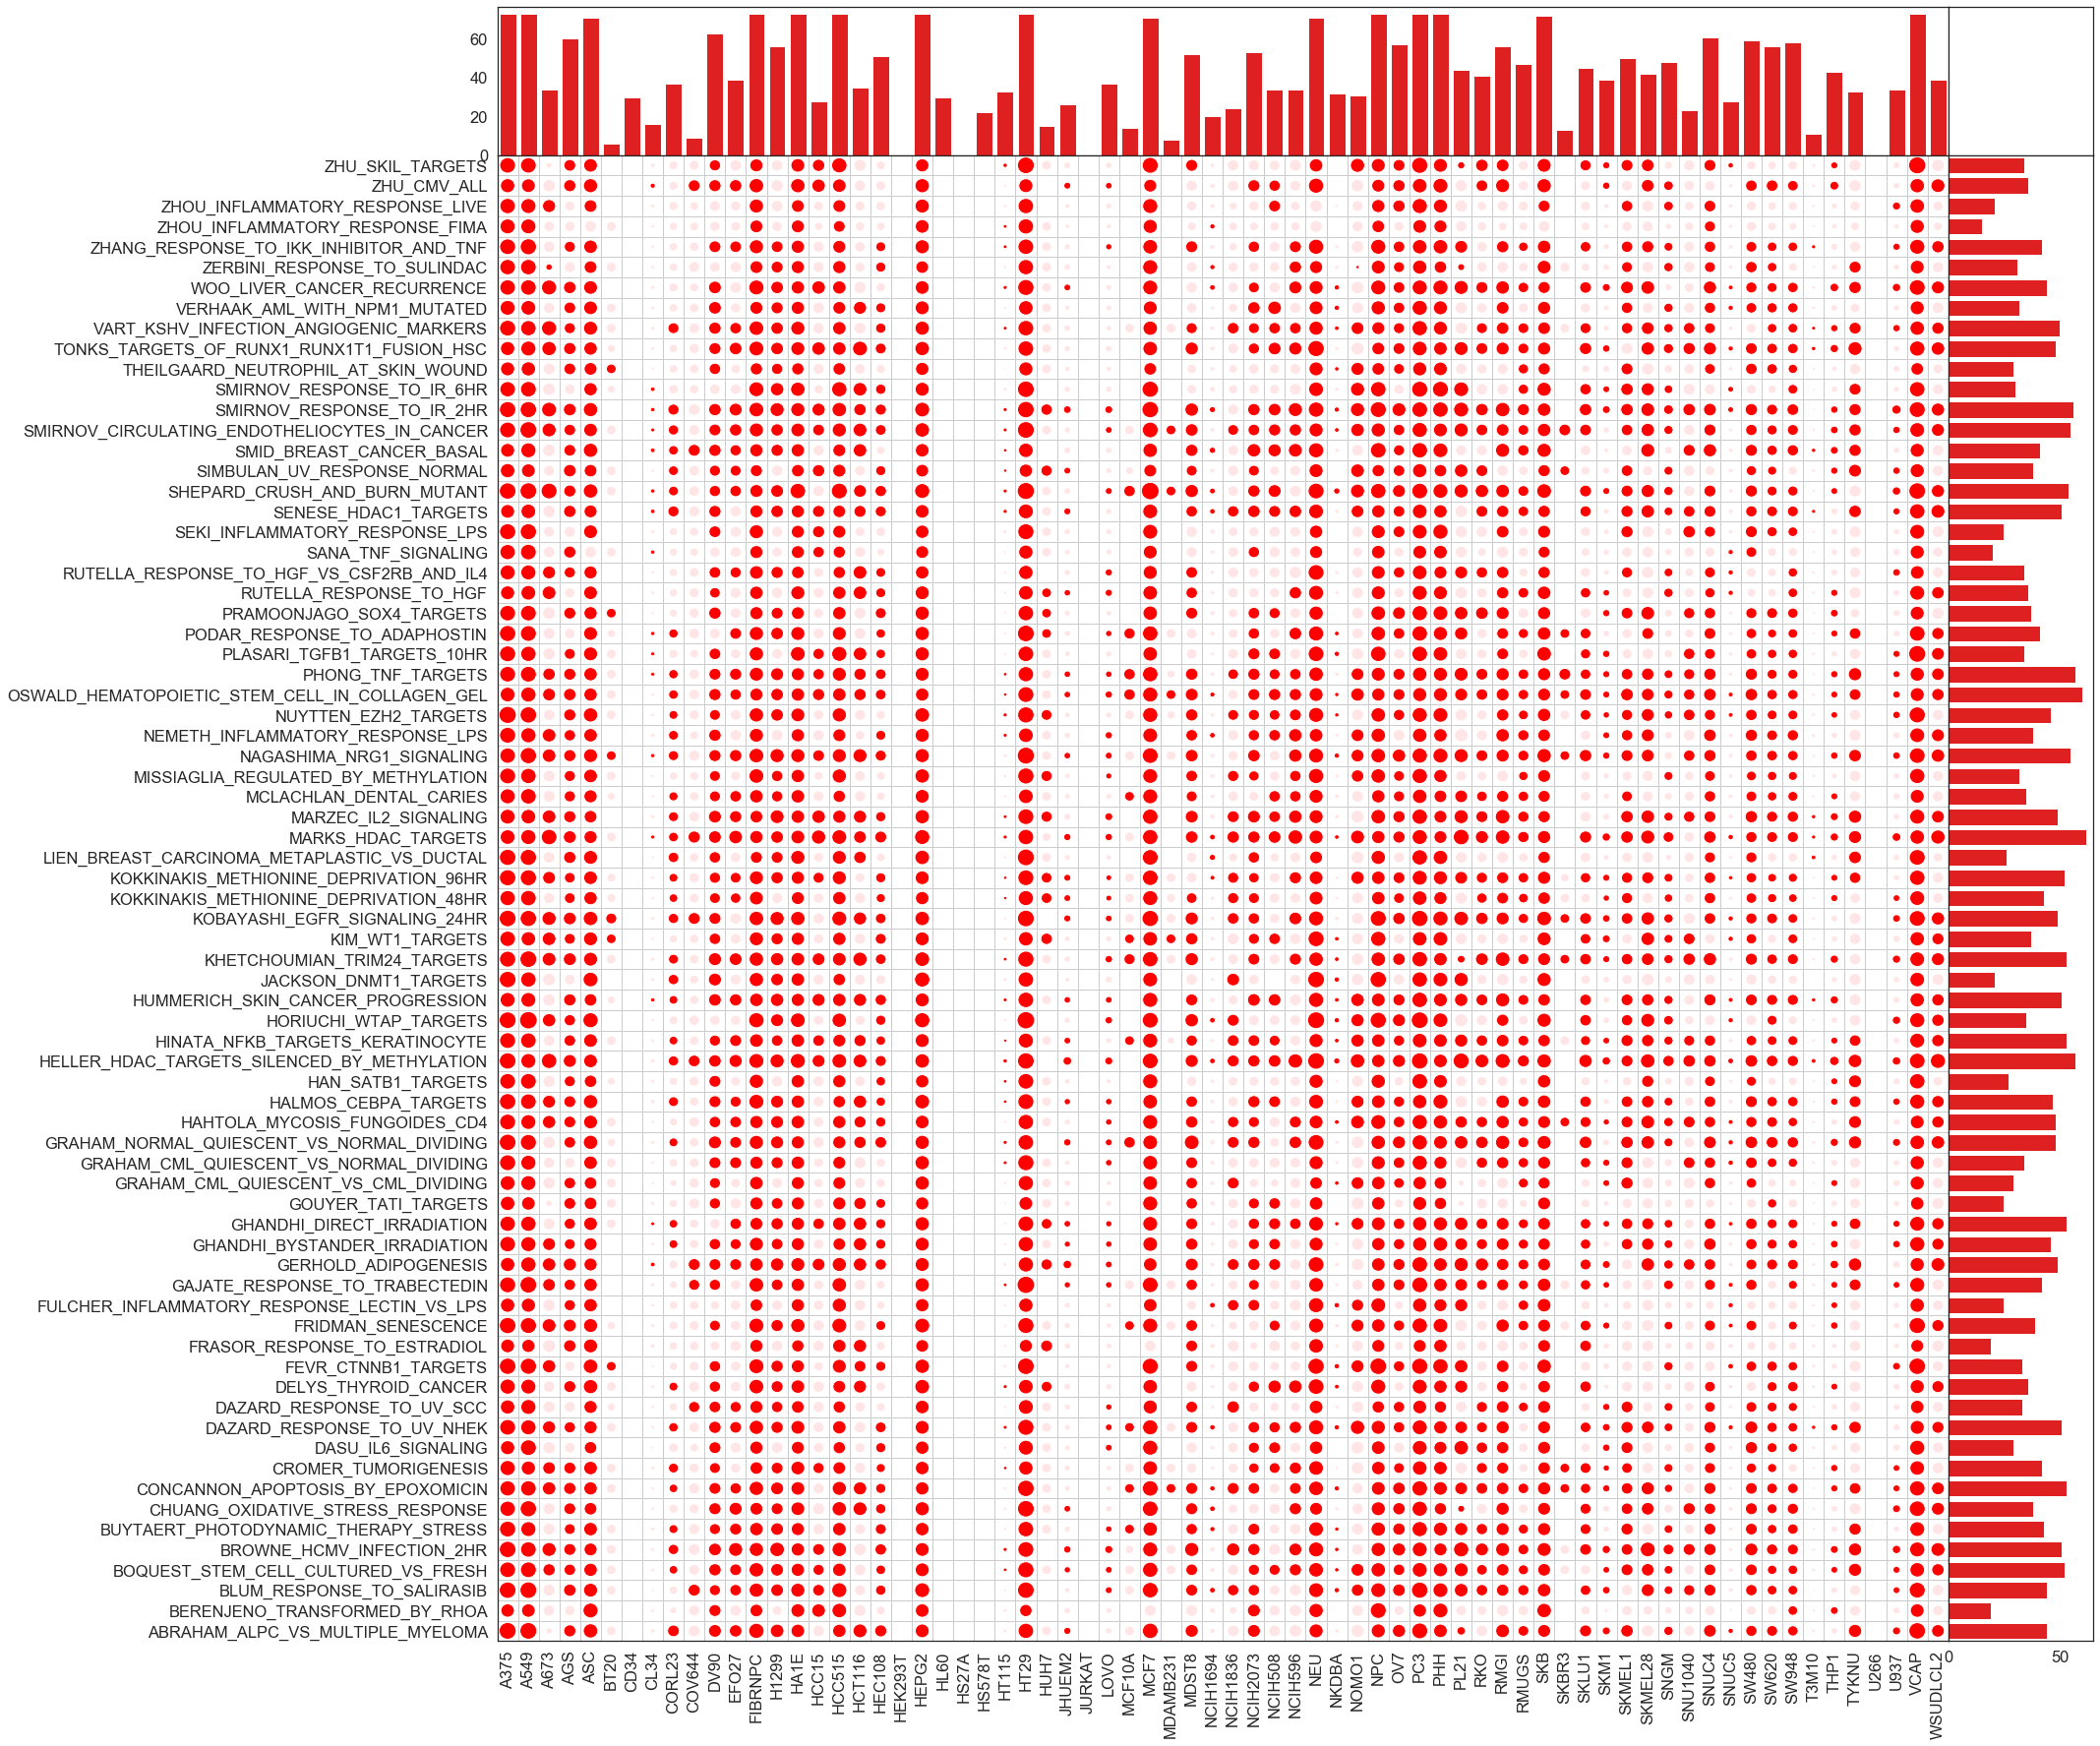

70 66
94.28571428571428


In [123]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})
method_name = 'QUIZ-C'
m = 'PACOS_tool_combined'

temp_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
temp_auroc_emp_pval_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
cols_df = pd.DataFrame(0.0, index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):

    temp_nested = pd.read_csv(proj_benchmark_outputs_path + 'Nested_%s_%s_r2.csv' % (method_name, geneset_name))
    for c in temp_nested['Cell_type'].unique():
        temp_auroc_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC' % m].unique()[0]
        temp_auroc_emp_pval_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC_emp_pval' % m].unique()[0]
        if temp_auroc_emp_pval_df.at[geneset_name, c] < 0.05: 
            cols_df.at[geneset_name, c] = 1.0

temp_auroc_df_nonan = temp_auroc_df.fillna(0.0)

N = temp_auroc_df.shape[0]
M = temp_auroc_df.shape[1]
ylabels = temp_auroc_df.index.values
xlabels = temp_auroc_df.columns.values

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = temp_auroc_df_nonan.values
c = cols_df.values # color could be based on whether the cell type significant or not based on the randomizations
my_cmap = sns.light_palette('Red', as_cmap=True)

sns.set(font_scale=1.5)
with sns.axes_style("white"):
    
    f, axs = plt.subplots(2, 2, figsize=(30, 25), gridspec_kw=dict(height_ratios=[0.1, 1], width_ratios=[1, 0.1], hspace=0, wspace=0))
    sns.barplot(x=cols_df.columns, y=cols_df.sum(axis=0), ax=axs[0, 0], color='red')
    plt.setp(axs[0, 0].get_xticklabels(), visible=False)
    
    plt.setp(axs[0, 1].get_xticklabels(), visible=False)
    plt.setp(axs[0, 1].get_yticklabels(), visible=False)

    R = s/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap=my_cmap)
    axs[1, 0].add_collection(col)

    axs[1, 0].set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    axs[1, 0].set_xticks(np.arange(M+1)-0.5, minor=True)
    axs[1, 0].set_yticks(np.arange(N+1)-0.5, minor=True)
    axs[1, 0].set_xticklabels(labels=xlabels, rotation=90)
    axs[1, 0].grid(which='minor')
    

    sns.barplot(x=cols_df.sort_index(ascending=False).sum(axis=1), y=cols_df.sort_index(ascending=False).index, ax=axs[1, 1], color='red')
    plt.setp(axs[1, 1].get_yticklabels(), visible=False)

    #fig.colorbar(col)
    #sns.despine()
    plt.tight_layout()
    plt.savefig(proj_output_path + 'auroc_circle_heatmap_%s_%s.pdf' % (method_name, m), format='pdf')
    plt.show()
    
print(len(cols_df.columns), len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]))
print(len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]) / len(cols_df.columns) * 100)

100%|██████████| 73/73 [01:10<00:00,  1.03it/s]


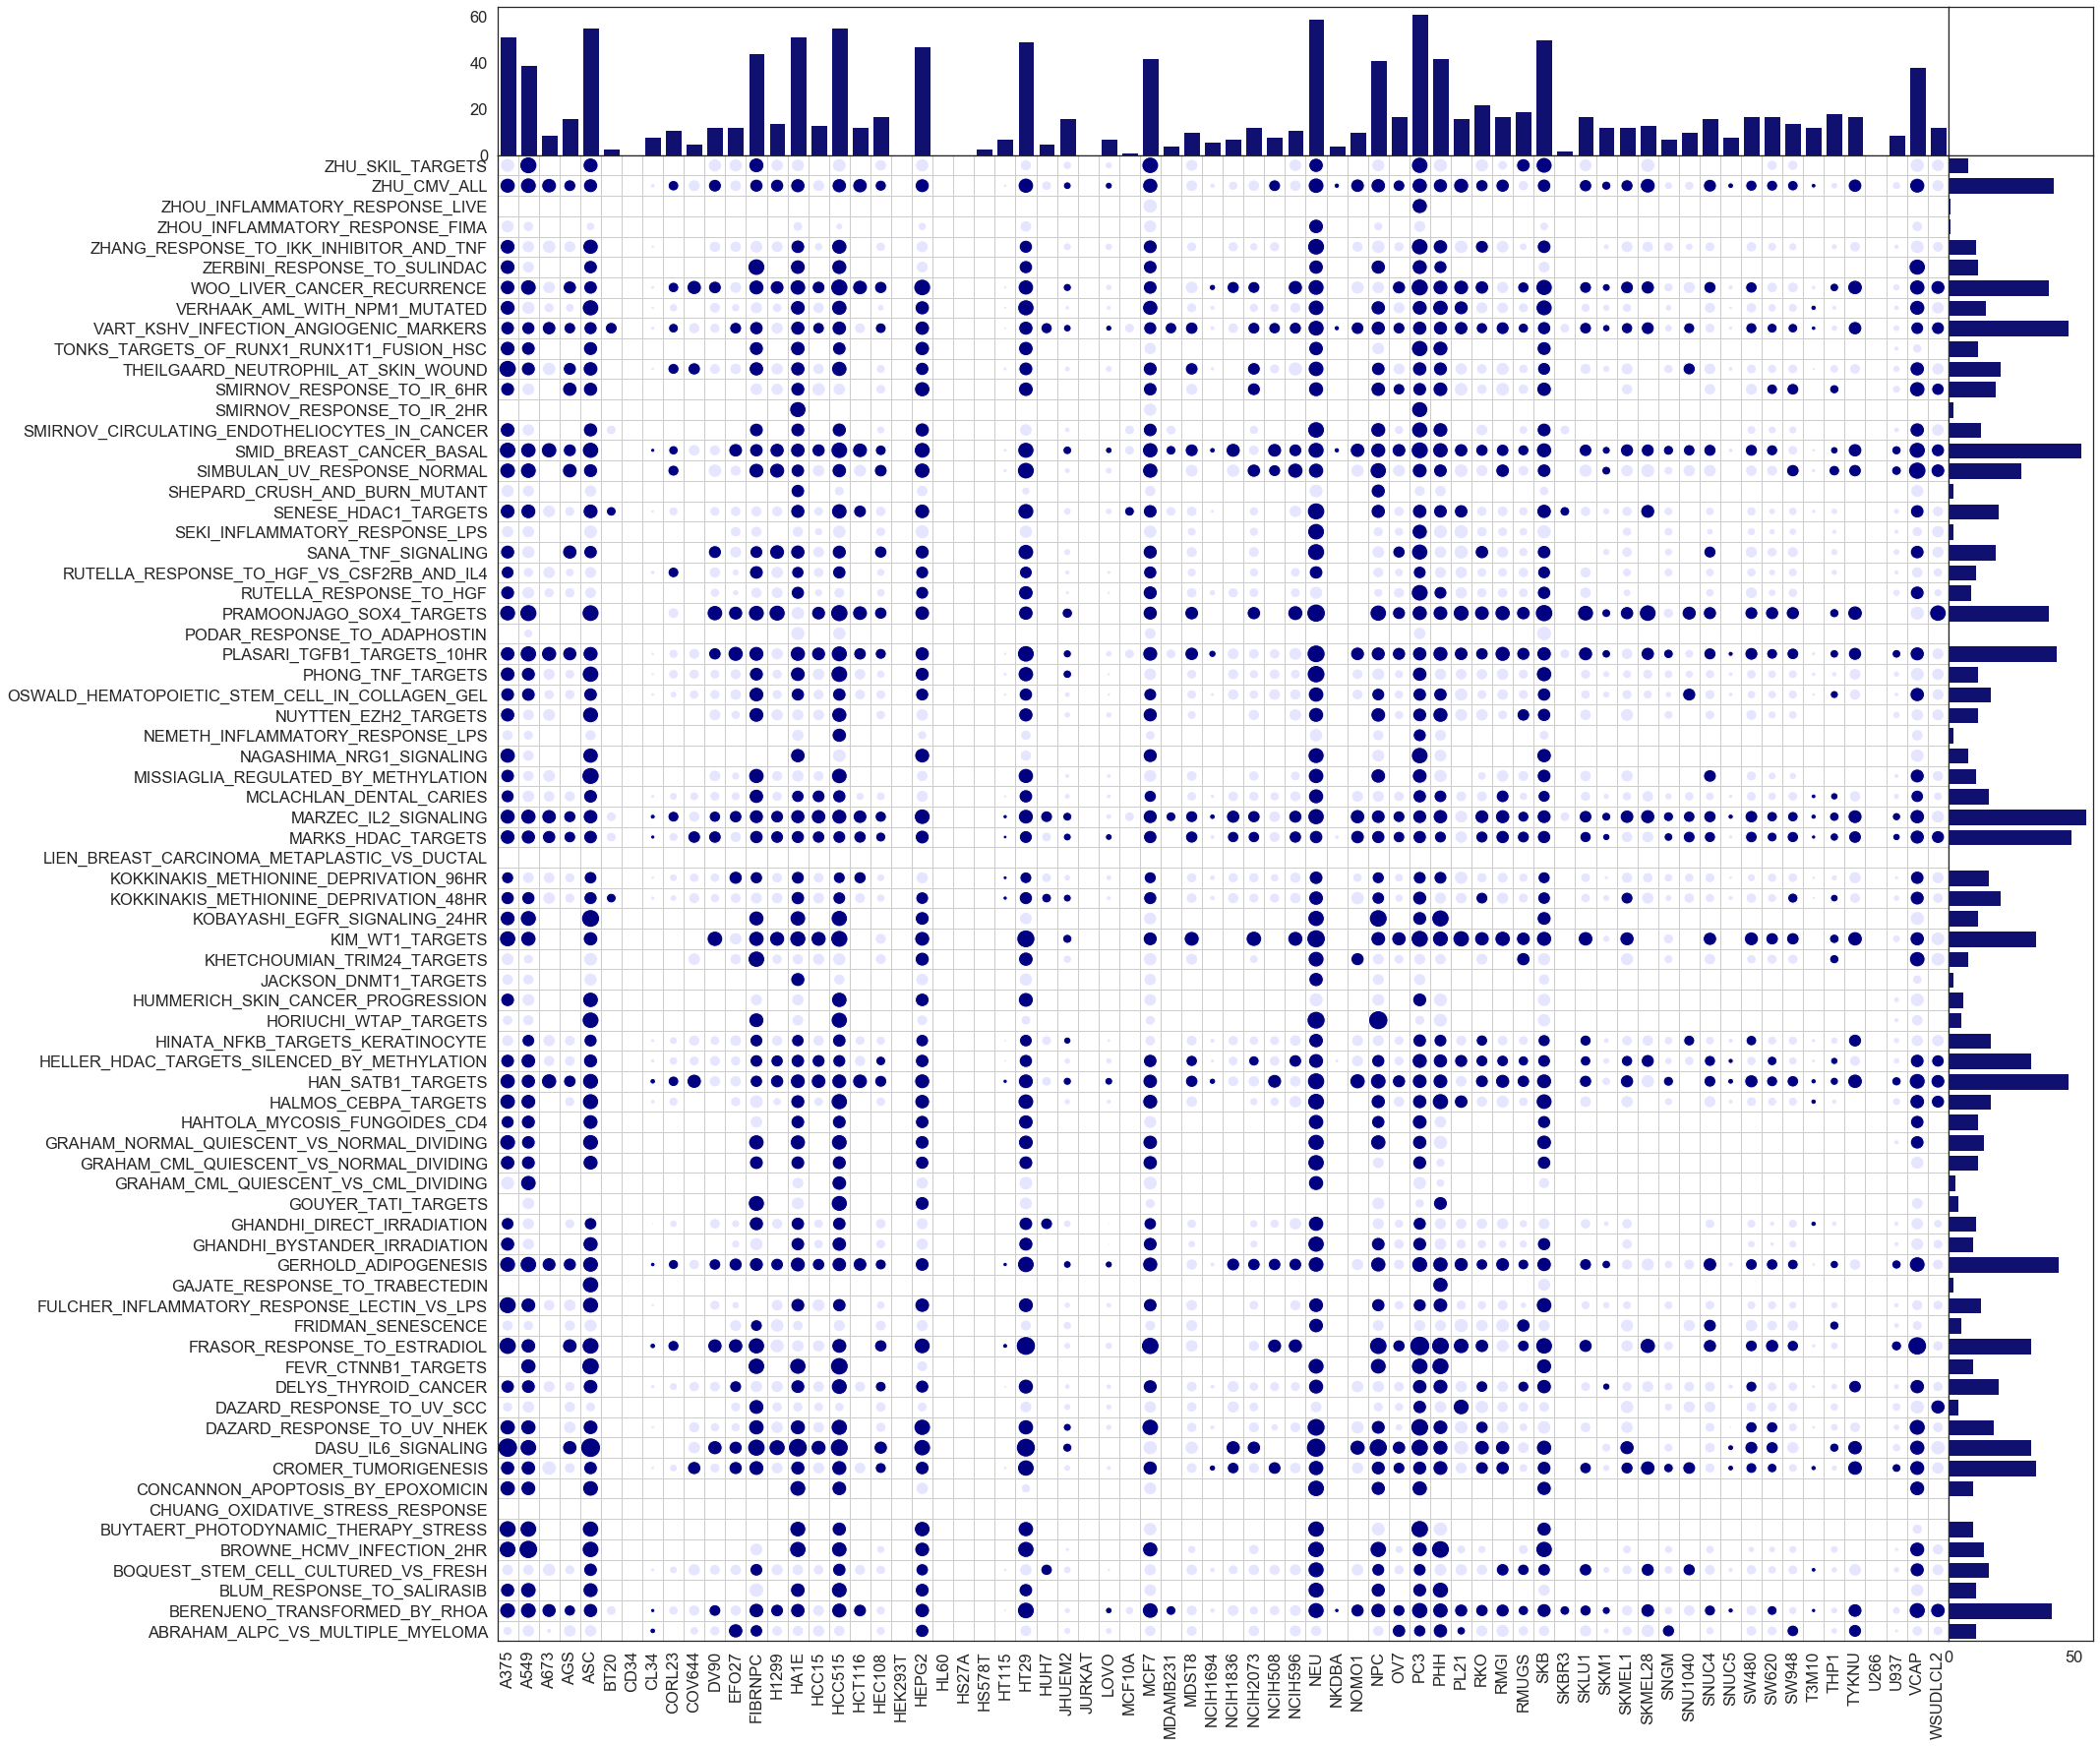

70 64
91.42857142857143


In [124]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})
method_name = 'QUIZ-C'
m = 'PACOS_tool_combined_reverse'

temp_auroc_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
temp_auroc_emp_pval_df = pd.DataFrame(index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])
cols_df = pd.DataFrame(0.0, index=benchmark_genesets['Geneset_name'].to_numpy(), columns=QUIZC_allcells['Cell_type'])

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):

    temp_nested = pd.read_csv(proj_benchmark_outputs_path + 'Nested_%s_%s_r2.csv' % (method_name, geneset_name))
    for c in temp_nested['Cell_type'].unique():
        temp_auroc_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC' % m].unique()[0]
        temp_auroc_emp_pval_df.at[geneset_name, c] = temp_nested[temp_nested['Cell_type']==c]['%s_AUROC_emp_pval' % m].unique()[0]
        if temp_auroc_emp_pval_df.at[geneset_name, c] < 0.05: 
            cols_df.at[geneset_name, c] = 1.0

temp_auroc_df_nonan = temp_auroc_df.fillna(0.0)

N = temp_auroc_df.shape[0]
M = temp_auroc_df.shape[1]
ylabels = temp_auroc_df.index.values
xlabels = temp_auroc_df.columns.values

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = temp_auroc_df_nonan.values
c = cols_df.values # color could be based on whether the cell type significant or not based on the randomizations
my_cmap = sns.light_palette('Navy', as_cmap=True)

sns.set(font_scale=1.5)
with sns.axes_style("white"):
    
    f, axs = plt.subplots(2, 2, figsize=(30, 25), gridspec_kw=dict(height_ratios=[0.1, 1], width_ratios=[1, 0.1], hspace=0, wspace=0))
    sns.barplot(x=cols_df.columns, y=cols_df.sum(axis=0), ax=axs[0, 0], color='Navy')
    plt.setp(axs[0, 0].get_xticklabels(), visible=False)
    
    plt.setp(axs[0, 1].get_xticklabels(), visible=False)
    plt.setp(axs[0, 1].get_yticklabels(), visible=False)

    R = s/2
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap=my_cmap)
    axs[1, 0].add_collection(col)

    axs[1, 0].set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    axs[1, 0].set_xticks(np.arange(M+1)-0.5, minor=True)
    axs[1, 0].set_yticks(np.arange(N+1)-0.5, minor=True)
    axs[1, 0].set_xticklabels(labels=xlabels, rotation=90)
    axs[1, 0].grid(which='minor')
    

    sns.barplot(x=cols_df.sort_index(ascending=False).sum(axis=1), y=cols_df.sort_index(ascending=False).index, ax=axs[1, 1], color='Navy')
    plt.setp(axs[1, 1].get_yticklabels(), visible=False)

    #fig.colorbar(col)
    #sns.despine()
    plt.tight_layout()
    plt.savefig(proj_output_path + 'auroc_circle_heatmap_%s_%s.pdf' % (method_name, m), format='pdf')
    plt.show()
    
print(len(cols_df.columns), len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]))
print(len(cols_df.sum(axis=0)[cols_df.sum(axis=0)>0.0]) / len(cols_df.columns) * 100)

## Extrinsic benchmark with L1000CDS2, DeepDRK and MI (Fig. 6B)

### L1000CDS2 vs QUIZ-C

In [139]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})

geneset_pert_iname_dict_rev = get_MSigDB_geneset_targets_CTD_FE(cgp_updn, cgp_updn_labels, 
                                                                proj_intermediary_outputs_path + 'FE_table_pvals_UP_DN.csv', 
                                                                proj_intermediary_outputs_path + 'FE_table_pvals_DN_UP.csv', 
                                                                adj_pval_threshold=0.01)

url = 'http://amp.pharm.mssm.edu/L1000CDS2/query'

L1000CDS2_resGeneSet_dict_rev = {}
L1000CDS2_result_df_dict_rev = {}
L1000CDS2_top50_TPoverlap_dict_rev = {}
for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):
    
    geneset_up = set(cgp_updn[geneset_name + '_UP'])
    geneset_dn = set(cgp_updn[geneset_name + '_DN'])   
    
    data = {"upGenes":list(geneset_up), "dnGenes":list(geneset_dn)}
    config = {"aggravate":False, "searchMethod":"geneSet", "share":False, "combination":False, "db-version":"latest"}
    #metadata = [{"key":"Tag","value":"gene-set python example"},{"key":"Cell","value":"PC3"}]
    payload = {"data":data,"config":config}
    headers = {'content-type':'application/json'}
    r = requests.post(url,data=json.dumps(payload),headers=headers)
    resGeneSet = r.json() 
    
    L1000CDS2_resGeneSet_dict_rev[geneset_name] = resGeneSet
    
    pert_names = [resGeneSet['topMeta'][i]['pert_id'].upper() for i in range(len(resGeneSet['topMeta']))]
    top50_inames_df = pd.merge(pd.DataFrame(pert_names), L1000_pert_info, left_on=0, right_on='pert_id', how='left')
    
    L1000CDS2_result_df_dict_rev[geneset_name] = top50_inames_df
    

    
    all_positives = set(QUIZC_alldrugs['Pert_iname']) & set(geneset_pert_iname_dict_rev[geneset_name])
    
    L1000CDS2_top50_TPoverlap_dict_rev[geneset_name] = len(set(top50_inames_df['pert_iname']) & set(all_positives))
    
with open(proj_intermediary_outputs_path + 'L1000CDS2_result_df_dict_rev.pickle', 'wb') as handle:
    pickle.dump(L1000CDS2_result_df_dict_rev, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(proj_intermediary_outputs_path + 'L1000CDS2_top50_TPoverlap_dict_rev.pickle', 'wb') as handle:
    pickle.dump(L1000CDS2_top50_TPoverlap_dict_rev, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 73/73 [00:45<00:00,  1.60it/s]


In [140]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})

geneset_pert_iname_dict_fwd = get_MSigDB_geneset_targets_CTD_FE(cgp_updn, cgp_updn_labels, 
                                                                proj_intermediary_outputs_path + 'FE_table_pvals_UP_UP.csv', 
                                                                proj_intermediary_outputs_path + 'FE_table_pvals_DN_DN.csv', 
                                                                adj_pval_threshold=0.01)

url = 'http://amp.pharm.mssm.edu/L1000CDS2/query'

L1000CDS2_resGeneSet_dict_fwd = {}
L1000CDS2_result_df_dict_fwd = {}
L1000CDS2_top50_TPoverlap_dict_fwd = {}
for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):
    
    geneset_up = set(cgp_updn[geneset_name + '_UP'])
    geneset_dn = set(cgp_updn[geneset_name + '_DN'])   
    
    data = {"upGenes":list(geneset_up), "dnGenes":list(geneset_dn)}
    config = {"aggravate":True, "searchMethod":"geneSet", "share":False, "combination":False, "db-version":"latest"}
    #metadata = [{"key":"Tag","value":"gene-set python example"},{"key":"Cell","value":"PC3"}]
    payload = {"data":data,"config":config}
    headers = {'content-type':'application/json'}
    r = requests.post(url,data=json.dumps(payload),headers=headers)
    resGeneSet = r.json() 
    
    L1000CDS2_resGeneSet_dict_fwd[geneset_name] = resGeneSet
    
    pert_names = [resGeneSet['topMeta'][i]['pert_id'].upper() for i in range(len(resGeneSet['topMeta']))]
    top50_inames_df = pd.merge(pd.DataFrame(pert_names), L1000_pert_info, left_on=0, right_on='pert_id', how='left')
    
    L1000CDS2_result_df_dict_fwd[geneset_name] = top50_inames_df
    

    
    all_positives = set(QUIZC_alldrugs['Pert_iname']) & set(geneset_pert_iname_dict_fwd[geneset_name])
    
    L1000CDS2_top50_TPoverlap_dict_fwd[geneset_name] = len(set(top50_inames_df['pert_iname']) & set(all_positives))
    
with open(proj_intermediary_outputs_path + 'L1000CDS2_result_df_dict_fwd.pickle', 'wb') as handle:
    pickle.dump(L1000CDS2_result_df_dict_fwd, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(proj_intermediary_outputs_path + 'L1000CDS2_top50_TPoverlap_dict_fwd.pickle', 'wb') as handle:
    pickle.dump(L1000CDS2_top50_TPoverlap_dict_fwd, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 73/73 [00:38<00:00,  1.90it/s]


In [141]:
QUIZC_top50_TPoverlap_dict_rev = {}
QUIZC_top50_TPoverlap_dict_tool_rev = {}
QUIZC_top50_TPoverlap_dict_combined_rev = {}


for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):
    
    QUIZC_pacos_tool_merged_df = pd.read_csv(proj_benchmark_outputs_path + 'QUIZ-C_%s_r2.csv' % geneset_name)
 
    QUIZC_ranked_df = QUIZC_pacos_tool_merged_df.sort_values('PACOS_Spearman_rho_reverse', ascending=False)  
    QUIZC_ranked_df_tool = QUIZC_pacos_tool_merged_df.sort_values('tool_score_imputed', ascending=False)  
    QUIZC_ranked_df_combined = QUIZC_pacos_tool_merged_df.sort_values('PACOS_tool_combined_reverse', ascending=False)  
 
    geneset_up = set(cgp_updn[geneset_name + '_UP'])
    geneset_dn = set(cgp_updn[geneset_name + '_DN']) 
    
    QUIZC_all_positives = set(QUIZC_alldrugs['Pert_iname']) & set(geneset_pert_iname_dict_rev[geneset_name])
    
    QUIZC_top50_TPoverlap_dict_rev[geneset_name] = len(set(QUIZC_ranked_df[0:50]['Pert_iname']) & set(QUIZC_all_positives))
    QUIZC_top50_TPoverlap_dict_tool_rev[geneset_name] = len(set(QUIZC_ranked_df_tool[0:50]['Pert_iname']) & set(QUIZC_all_positives))
    QUIZC_top50_TPoverlap_dict_combined_rev[geneset_name] = len(set(QUIZC_ranked_df_combined[0:50]['Pert_iname']) & set(QUIZC_all_positives))

100%|██████████| 73/73 [00:22<00:00,  3.22it/s]


In [142]:
QUIZC_top50_TPoverlap_dict_fwd = {}
QUIZC_top50_TPoverlap_dict_tool_fwd = {}
QUIZC_top50_TPoverlap_dict_combined_fwd = {}

for geneset_name in tqdm(benchmark_genesets['Geneset_name'].to_numpy(), position=0, leave=True):
    
    QUIZC_pacos_tool_merged_df = pd.read_csv(proj_benchmark_outputs_path + 
                                             'QUIZ-C_%s_r2.csv' % geneset_name)
    
    QUIZC_ranked_df = QUIZC_pacos_tool_merged_df.sort_values('PACOS_Spearman_rho', ascending=False)  
    QUIZC_ranked_df_tool = QUIZC_pacos_tool_merged_df.sort_values('tool_score_imputed', ascending=False)  
    QUIZC_ranked_df_combined = QUIZC_pacos_tool_merged_df.sort_values('PACOS_tool_combined', ascending=False)  
 
    geneset_up = set(cgp_updn[geneset_name + '_UP'])
    geneset_dn = set(cgp_updn[geneset_name + '_DN']) 
    
    QUIZC_all_positives = set(QUIZC_alldrugs['Pert_iname']) & set(geneset_pert_iname_dict_fwd[geneset_name])
    
    QUIZC_top50_TPoverlap_dict_fwd[geneset_name] = len(set(QUIZC_ranked_df[0:50]['Pert_iname']) & set(QUIZC_all_positives))
    QUIZC_top50_TPoverlap_dict_tool_fwd[geneset_name] = len(set(QUIZC_ranked_df_tool[0:50]['Pert_iname']) & set(QUIZC_all_positives))
    QUIZC_top50_TPoverlap_dict_combined_fwd[geneset_name] = len(set(QUIZC_ranked_df_combined[0:50]['Pert_iname']) & set(QUIZC_all_positives))

100%|██████████| 73/73 [00:21<00:00,  3.37it/s]


### MI and DeepDRK vs QUIZ-C

In [ ]:
MI_QUIZC_AUROCs = pd.read_csv(proj_path + 'MI_Pathopticon_benchmark/' + 'MI_QUIZC_AUROCs.csv', index_col=0)

In [34]:
Harmonizome_GEO_updn, Harmonizome_GEO_updn_labels = import_Harmonizome(proj_path + 'MI_Pathopticon_benchmark/' + 
                                                                       'Harmonizome_GEO_gene_set_library_up_crisp.gmt', 
                                                                       proj_path + 'MI_Pathopticon_benchmark/' + 
                                                                       'Harmonizome_GEO_gene_set_library_dn_crisp.gmt')

In [35]:
DeepDRK_geneset_pert_iname_dict_fwd = get_MSigDB_geneset_targets_CTD_FE(Harmonizome_GEO_updn, Harmonizome_GEO_updn_labels, 
                                                                proj_rev_path + 'REV_ALLcellsCTD_FE_directed_MI_Pathopticon_benchmark_outputs/' + 'FE_table_adj_pvals_UP_UP.csv', 
                                                                proj_rev_path + 'REV_ALLcellsCTD_FE_directed_MI_Pathopticon_benchmark_outputs/' + 'FE_table_adj_pvals_DN_DN.csv',
                                                               adj_pval_threshold=0.1)
DeepDRK_geneset_pert_iname_dict_rev = get_MSigDB_geneset_targets_CTD_FE(Harmonizome_GEO_updn, Harmonizome_GEO_updn_labels, 
                                                                proj_rev_path + 'REV_ALLcellsCTD_FE_directed_MI_Pathopticon_benchmark_outputs/' + 'FE_table_adj_pvals_UP_DN.csv', 
                                                                proj_rev_path + 'REV_ALLcellsCTD_FE_directed_MI_Pathopticon_benchmark_outputs/' + 'FE_table_adj_pvals_DN_UP.csv',
                                                               adj_pval_threshold=0.1) 

100%|██████████| 233/233 [00:00<00:00, 458.94it/s]


In [36]:
DeepDRK_fwd_positives_df = pd.DataFrame([(i, len(DeepDRK_geneset_pert_iname_dict_fwd[i])) 
                                         for i in  DeepDRK_geneset_pert_iname_dict_fwd.keys()]).rename(columns={0:'Geneset_name',
                                                                                                            1:'# positives'})
DeepDRK_rev_positives_df = pd.DataFrame([(i, len(DeepDRK_geneset_pert_iname_dict_rev[i])) 
                                         for i in  DeepDRK_geneset_pert_iname_dict_rev.keys()]).rename(columns={0:'Geneset_name',
                                                                                                            1:'# positives'})

In [37]:
DeepDRK_benchmark_genesets = pd.read_csv('/Volumes/Partition1/DeepDRK/GSE_dict_for_DeepDRK.csv')

DeepDRK_GSEs = ['GSE3678', 'GSE5090', 'GSE3112', 'GSE6012', 'GSE4107']
DeepDRK_auroc_fwd_df = pd.DataFrame(index=DeepDRK_benchmark_genesets['Disease'].values, columns=['max AUROC', 'max AUPRC'])

for i in tqdm(DeepDRK_GSEs, position=0, leave=True):
    
    DeepDRK_pos = DeepDRK_geneset_pert_iname_dict_fwd[DeepDRK_benchmark_genesets[DeepDRK_benchmark_genesets['GSE_number'] == i]
                                          ['Disease'].values[0]]    
    
    DeepDRK_result = pd.read_csv('/Volumes/Partition1/DeepDRK/data/%s_DeepDRK_results.csv' % i)
    DeepDRK_result_samples = DeepDRK_result['cell'].unique()
    
    DeepDRK_result_sample_auroc_df = pd.DataFrame(index=DeepDRK_result_samples, columns=['AUROC', 'AUPRC'])
    
    for s in DeepDRK_result_samples:
        DeepDRK_sample_ranked = DeepDRK_result[DeepDRK_result['cell']==s].sort_values(['prob'], ascending=False)['drug']
        auroc, auprc = AUROC_AUPRC(DeepDRK_sample_ranked, DeepDRK_pos, auc_threshold=2)
        DeepDRK_result_sample_auroc_df.at[s, 'AUROC'] = auroc
        DeepDRK_result_sample_auroc_df.at[s, 'AUPRC'] = auprc
    
   
    DeepDRK_auroc_fwd_df.at[DeepDRK_benchmark_genesets[DeepDRK_benchmark_genesets['GSE_number'] == i]['Disease'].values[0], 
                        'max AUROC'] = DeepDRK_result_sample_auroc_df['AUROC'].max()
    DeepDRK_auroc_fwd_df.at[DeepDRK_benchmark_genesets[DeepDRK_benchmark_genesets['GSE_number'] == i]['Disease'].values[0], 
                        'max AUPRC'] = DeepDRK_result_sample_auroc_df['AUPRC'].max()
    
DeepDRK_auroc_fwd_df['Model'] = 'DeepDRK_fwd'
DeepDRK_auroc_fwd_df = DeepDRK_auroc_fwd_df.rename(columns={'max AUROC': 'AUROC'})
DeepDRK_auroc_fwd_df = DeepDRK_auroc_fwd_df[['Model', 'AUROC']]

100%|██████████| 5/5 [01:04<00:00, 12.87s/it]


In [ ]:
models=['PACOS_Spearman_rho', 'PACOS_Spearman_rho_reverse', 'PACOS_tool_combined', 'PACOS_tool_combined_reverse']
DeepDRK_benchmark_genesets = pd.read_csv(proj_rev_path + 'DeepDRK_benchmark_genesets.csv', header=None).rename(columns={0: 'Geneset_name'})       
method_names = ['QUIZ-C']
r = 2

DeepDRK_all_aurocs_concat_df = pd.DataFrame(columns=['Model', 'AUROC'])

for m in tqdm(models, position=0, leave=True):

    for method_name in method_names:

        temp_auroc_df = pd.DataFrame(index=DeepDRK_benchmark_genesets['Geneset_name'].to_numpy(), columns=['AUROC'])
        
        for geneset_name in DeepDRK_benchmark_genesets['Geneset_name']:

            temp_nested = pd.read_csv(proj_rev_path + 'REV_ALLcellsCTD_FE_directed_MI_Pathopticon_benchmark_outputs/' + 
                                      'Nested_%s_%s_r%s.csv' % (method_name, geneset_name, int(r)))
            temp_auroc_df.at[geneset_name, 'AUROC'] = temp_nested['%s_AUROC' % m].max()
          
        temp_auroc_df['Model'] = '%s_%s' % (method_name, m)    
                               
        DeepDRK_all_aurocs_concat_df = pd.concat([DeepDRK_all_aurocs_concat_df, temp_auroc_df])
        
DeepDRK_all_aurocs_concat_df = pd.concat([DeepDRK_all_aurocs_concat_df, DeepDRK_auroc_fwd_df])
DeepDRK_all_aurocs_concat_df = pd.concat([DeepDRK_all_aurocs_concat_df, DeepDRK_auroc_rev_df])

In [ ]:
MI_QUIZC_AUROCs['Model'] = 'MI_' + MI_QUIZC_AUROCs['Model']
DeepDRK_all_aurocs_concat_df['Model'] = 'DeepDRK_' + DeepDRK_all_aurocs_concat_df['Model']
MI_DeepDRK_all_aurocs_concat_df = pd.concat([DeepDRK_all_aurocs_concat_df, MI_QUIZC_AUROCs])

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.set(font_scale=1.5)
with sns.axes_style('ticks'):
    
    gs = gridspec.GridSpec(1, 2, width_ratios=[6, 15]) 
    ax0 = plt.subplot(gs[0])
    
    box1 = ax0.boxplot(QUIZC_top50_TPoverlap_dict_fwd.values(), widths=0.8, positions=[1], notch=False, patch_artist=True, showfliers=False) 
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color='limegreen', linewidth=2.0)
    plt.setp(box1["boxes"], facecolor='white')
    plt.setp(box1["fliers"], markeredgecolor='limegreen')  
    
    box2 = ax0.boxplot(QUIZC_top50_TPoverlap_dict_rev.values(), widths=0.8, positions=[2], notch=False, patch_artist=True, showfliers=False) 
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box2[item], color='limegreen', linewidth=2.0)
    plt.setp(box2["boxes"], facecolor='white')
    plt.setp(box2["fliers"], markeredgecolor='limegreen')   
    
    box3 = ax0.boxplot(QUIZC_top50_TPoverlap_dict_combined_fwd.values(), widths=0.8, positions=[3], notch=False, patch_artist=True, showfliers=False) 
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box3[item], color='limegreen', linewidth=2.0)
    plt.setp(box3["boxes"], facecolor='white')
    plt.setp(box3["fliers"], markeredgecolor='limegreen') 
    
    box4 = ax0.boxplot(QUIZC_top50_TPoverlap_dict_combined_rev.values(), widths=0.8, positions=[4], notch=False, patch_artist=True, showfliers=False) 
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box4[item], color='limegreen', linewidth=2.0)
    plt.setp(box4["boxes"], facecolor='white')
    plt.setp(box4["fliers"], markeredgecolor='limegreen')  
    

    box5 = ax0.boxplot(L1000CDS2_top50_TPoverlap_dict_fwd.values(), widths=0.8, positions=[5], notch=False, patch_artist=True, showfliers=False) 
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box5[item], color='pink', linewidth=2.0)
    plt.setp(box5["boxes"], facecolor='white')
    plt.setp(box5["fliers"], markeredgecolor='pink') 
      
    box6 = ax0.boxplot(L1000CDS2_top50_TPoverlap_dict_rev.values(), widths=0.8, positions=[6], notch=False, patch_artist=True, showfliers=False) 
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box6[item], color='pink', linewidth=2.0)
    plt.setp(box6["boxes"], facecolor='white')
    plt.setp(box6["fliers"], markeredgecolor='pink') 
    
    plt.xticks(np.arange(1, 7),  ['PACOS-QUIZ-C_fwd', 'PACOS-QUIZ-C_rev', 'PACOS-QUIZ-C-Tool_fwd',
                                 'PACOS-QUIZ-C-Tool_rev', 'L1000CDS2_fwd', 'L1000CDS2_rev'])
    plt.xticks(rotation=90)
    plt.ylabel('# positives in top-50')
    
    ax1 = plt.subplot(gs[1])    
    
    cols = ['limegreen', 'limegreen', 'limegreen', 'limegreen', 'pink', 'pink', 
           'limegreen', 'limegreen', 'limegreen', 'limegreen', 'pink', 'pink', 'pink', 'pink', 'pink']
    
    sns.boxplot(x='Model', y='AUROC', data=MI_DeepDRK_all_aurocs_concat_df, showcaps=True, notch=False, showfliers=False, 
                boxprops={'linewidth':2}, whiskerprops={'linewidth':2}, palette=cols, ax=ax1)
    for i,artist in enumerate(ax1.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = ax1.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
        
    plt.xticks(rotation=90)
    #plt.ylim(0.40, 1.0)
    plt.tight_layout()
    sns.despine()
    plt.ylabel('max AUROC')
  
    plt.savefig(proj_output_path + 'L1000CDS2_MI_DeepDRK_QUIZC.pdf', format='pdf')   
    plt.show()

## Chemical structure similarity of drug-perturbation networks (Supp. Figs. 20-21)

In [125]:
QUIZC_cids_inchi_smiles = pd.read_csv(proj_intermediary_outputs_path + 'QUIZC_drug_CIDs_inchi_smiles.csv')

In [126]:
benchmark_genesets = pd.read_csv(proj_intermediary_outputs_path + 'FE_adj_100_benchmark_genesets.csv', 
                                 header=None).rename(columns={0: 'Geneset_name'})

In [127]:
apfp_Tanimoto_QUIZC = pd.read_csv(proj_intermediary_outputs_path +  'APFPsim_Tanimoto_scores_QRZC_cids_inchi_smiles.csv')
apfp_Tanimoto_QUIZC['Compound A'] = apfp_Tanimoto_QUIZC['Compound A'].astype('float')
apfp_Tanimoto_QUIZC['Compound B'] = apfp_Tanimoto_QUIZC['Compound B'].astype('float')

apfp_Tanimoto_QUIZC_pert_iname = pd.merge(pd.merge(apfp_Tanimoto_QUIZC, QUIZC_cids_inchi_smiles, how='left', left_on='Compound A', 
                                                  right_on='pubchem_cid_x'), QUIZC_cids_inchi_smiles, how='left', left_on='Compound B', 
                                         right_on='pubchem_cid_x')[['Compound A', 'Compound B', 'Pert_iname_x', 
                                                                    'Pert_iname_y', 'Tanimoto coefficient']]
apfp_Tanimoto_QUIZC_pert_cid_dict = {}
for i, j, k in apfp_Tanimoto_QUIZC_pert_iname[['Compound A', 'Compound B', 'Tanimoto coefficient']].values:
    apfp_Tanimoto_QUIZC_pert_cid_dict[(i, j)] = k
    apfp_Tanimoto_QUIZC_pert_cid_dict[(j, i)] = k

100%|██████████| 73/73 [01:05<00:00,  1.12it/s]


66


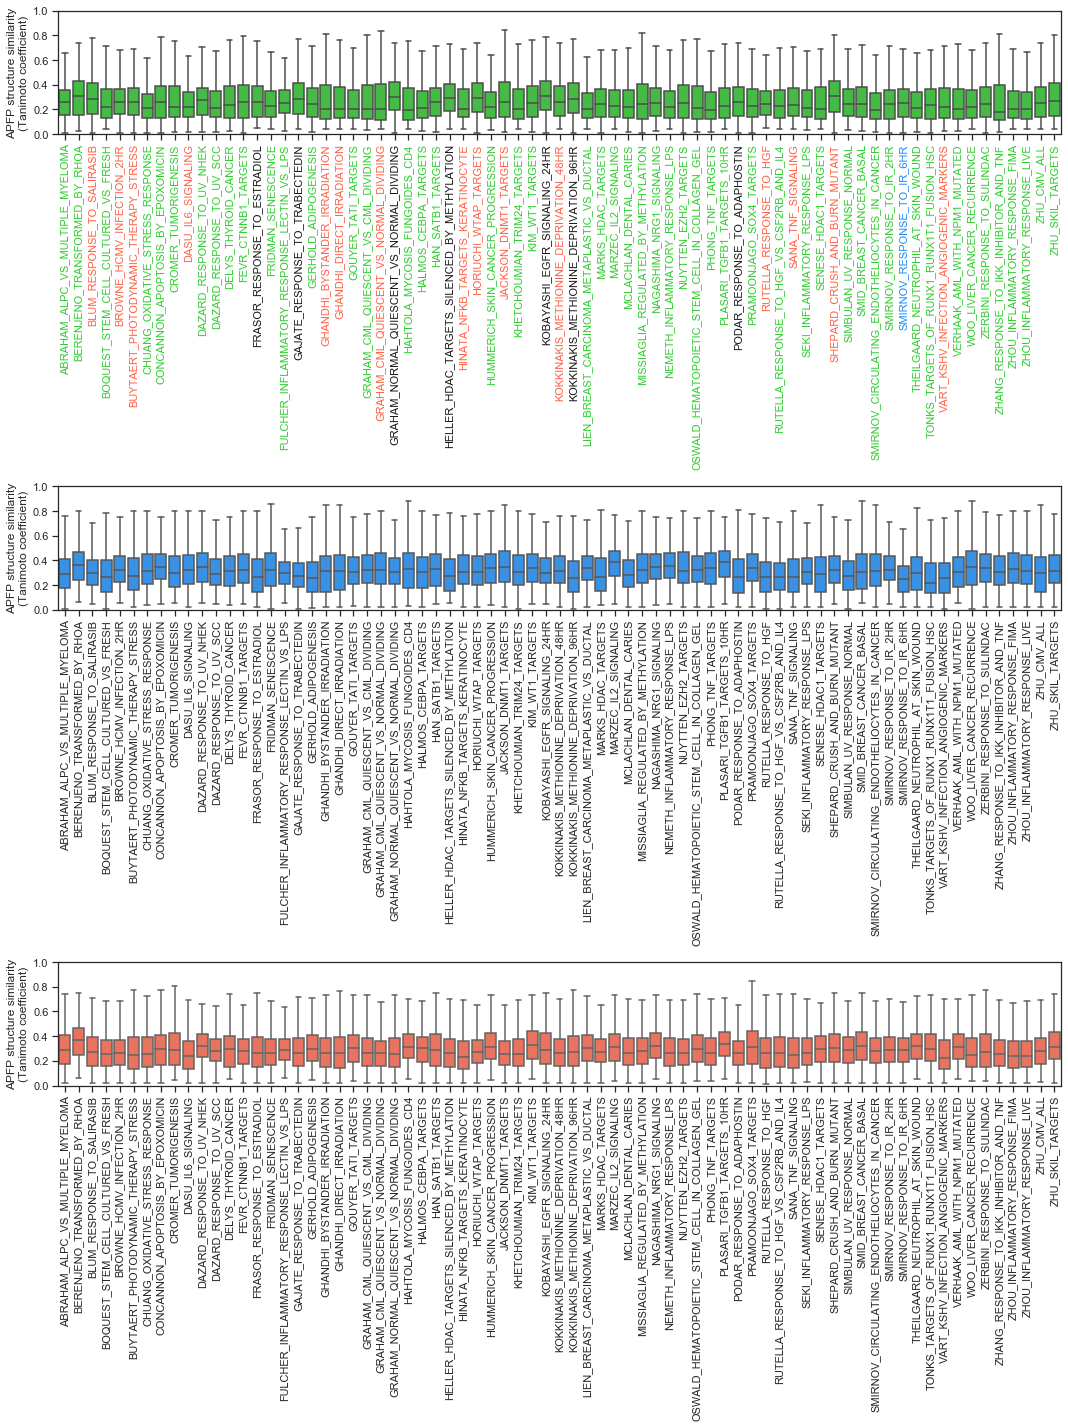

In [129]:
model = 'PACOS_tool_combined_reverse'
QUIZC_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                              benchmark_genesets, apfp_Tanimoto_QUIZC_pert_iname, method_name='QUIZ-C', 
                                              model=model, topN=50)

MODZ_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                             benchmark_genesets, apfp_Tanimoto_QUIZC_pert_iname, method_name='MODZ', 
                                             model=model, topN=50)

CD_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                           benchmark_genesets, apfp_Tanimoto_QUIZC_pert_iname, method_name='CD', 
                                           model=model, topN=50)

QUIZC_top50_tanimoto_dict_labels, QUIZC_top50_tanimoto_dict_data = [*zip(*QUIZC_top50_tanimoto_dict.items())]
MODZ_top50_tanimoto_dict_labels, MODZ_top50_tanimoto_dict_data = [*zip(*MODZ_top50_tanimoto_dict.items())]
CD_top50_tanimoto_dict_labels, CD_top50_tanimoto_dict_data = [*zip(*CD_top50_tanimoto_dict.items())]

colors = []
for x_QUIZC, x_MODZ, x_CD in zip(QUIZC_top50_tanimoto_dict_data, MODZ_top50_tanimoto_dict_data, CD_top50_tanimoto_dict_data):
    if (((np.mean(x_QUIZC) - np.mean(x_CD) < 0) & (st.mannwhitneyu(x_QUIZC, x_CD)[1] <= 0.05)) & 
        ((np.mean(x_QUIZC) - np.mean(x_MODZ) < 0) & (st.mannwhitneyu(x_QUIZC, x_MODZ)[1] <= 0.05))):
        colors.append('limegreen')
    elif ((np.mean(x_QUIZC) - np.mean(x_CD) < 0) & (st.mannwhitneyu(x_QUIZC, x_CD)[1] <= 0.05)):
        colors.append('dodgerblue')
    elif ((np.mean(x_QUIZC) - np.mean(x_MODZ) < 0) & (st.mannwhitneyu(x_QUIZC, x_MODZ)[1] <= 0.05)):
        colors.append('tomato')
    else:
        colors.append('k')
print(sum([(c=='limegreen') | (c=='dodgerblue') | (c=='tomato')  for c in colors]))

fig = plt.figure()
fig.set_size_inches(15, 20)
sns.set(font_scale=1.0)
with sns.axes_style("ticks"):
    ax1 = plt.subplot(311)
    sns.boxplot(data=QUIZC_top50_tanimoto_dict_data, color='limegreen', showfliers = False)
    for color, tick in zip(colors, ax1.xaxis.get_major_ticks()):
        tick.label1.set_color(color)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(QUIZC_top50_tanimoto_dict_labels)), QUIZC_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    ax2 = plt.subplot(312)
    sns.boxplot(data=MODZ_top50_tanimoto_dict_data, color='dodgerblue', showfliers = False)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(MODZ_top50_tanimoto_dict_labels)), MODZ_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    ax3 = plt.subplot(313)
    sns.boxplot(data=CD_top50_tanimoto_dict_data, color='tomato', showfliers = False)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(CD_top50_tanimoto_dict_labels)), CD_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    plt.tight_layout()
    plt.savefig(proj_output_path + 'QUIZC-MODZ-CD_Top50_Tanimoto_%s.pdf' % model, format='pdf')

100%|██████████| 73/73 [01:04<00:00,  1.13it/s]


47


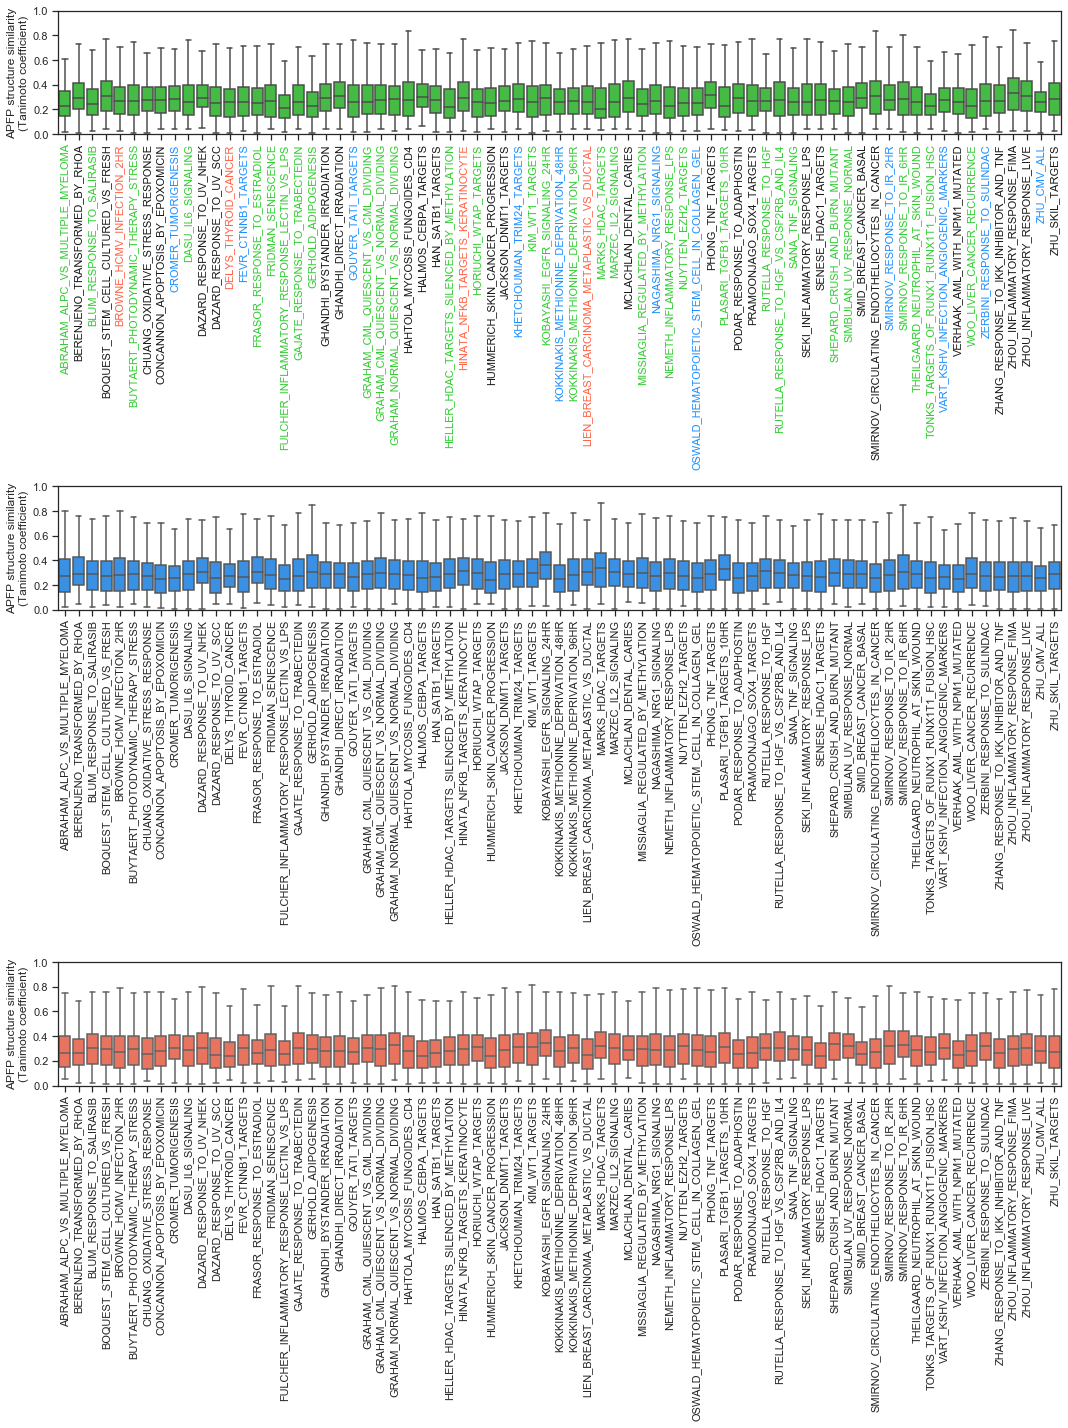

In [130]:
model = 'PACOS_tool_combined'
QUIZC_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                              benchmark_genesets, apfp_Tanimoto_QUIZC_pert_iname, method_name='QUIZ-C', 
                                              model=model, topN=50)

MODZ_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                             benchmark_genesets, apfp_Tanimoto_QUIZC_pert_iname, method_name='MODZ', 
                                             model=model, topN=50)

CD_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                           benchmark_genesets, apfp_Tanimoto_QUIZC_pert_iname, method_name='CD', 
                                           model=model, topN=50)

QUIZC_top50_tanimoto_dict_labels, QUIZC_top50_tanimoto_dict_data = [*zip(*QUIZC_top50_tanimoto_dict.items())]
MODZ_top50_tanimoto_dict_labels, MODZ_top50_tanimoto_dict_data = [*zip(*MODZ_top50_tanimoto_dict.items())]
CD_top50_tanimoto_dict_labels, CD_top50_tanimoto_dict_data = [*zip(*CD_top50_tanimoto_dict.items())]

colors = []
for x_QUIZC, x_MODZ, x_CD in zip(QUIZC_top50_tanimoto_dict_data, MODZ_top50_tanimoto_dict_data, CD_top50_tanimoto_dict_data):
    if (((np.mean(x_QUIZC) - np.mean(x_CD) < 0) & (st.mannwhitneyu(x_QUIZC, x_CD)[1] <= 0.05)) & 
        ((np.mean(x_QUIZC) - np.mean(x_MODZ) < 0) & (st.mannwhitneyu(x_QUIZC, x_MODZ)[1] <= 0.05))):
        colors.append('limegreen')
    elif ((np.mean(x_QUIZC) - np.mean(x_CD) < 0) & (st.mannwhitneyu(x_QUIZC, x_CD)[1] <= 0.05)):
        colors.append('dodgerblue')
    elif ((np.mean(x_QUIZC) - np.mean(x_MODZ) < 0) & (st.mannwhitneyu(x_QUIZC, x_MODZ)[1] <= 0.05)):
        colors.append('tomato')
    else:
        colors.append('k')
print(sum([(c=='limegreen') | (c=='dodgerblue') | (c=='tomato')  for c in colors]))

fig = plt.figure()
fig.set_size_inches(15, 20)
sns.set(font_scale=1.0)
with sns.axes_style("ticks"):
    ax1 = plt.subplot(311)
    sns.boxplot(data=QUIZC_top50_tanimoto_dict_data, color='limegreen', showfliers = False)
    for color, tick in zip(colors, ax1.xaxis.get_major_ticks()):
        tick.label1.set_color(color)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(QUIZC_top50_tanimoto_dict_labels)), QUIZC_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    ax2 = plt.subplot(312)
    sns.boxplot(data=MODZ_top50_tanimoto_dict_data, color='dodgerblue', showfliers = False)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(MODZ_top50_tanimoto_dict_labels)), MODZ_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    ax3 = plt.subplot(313)
    sns.boxplot(data=CD_top50_tanimoto_dict_data, color='tomato', showfliers = False)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(CD_top50_tanimoto_dict_labels)), CD_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    plt.tight_layout()
    plt.savefig(proj_output_path + 'QUIZC-MODZ-CD_Top50_Tanimoto_%s.pdf' % model, format='pdf')

## Structural similarity matrices of QUIZ-C vs L1000CDS2 top-50 drugs (Supp. Figs. 22-23)

In [134]:
L1000CDS2_cids_inchi_smiles = pd.read_csv(proj_intermediary_outputs_path + 'L1000CDS2_top50_alldrugs_CIDs_inchi_smiles.csv')

In [135]:
apfp_Tanimoto_L1000CDS2 = pd.read_csv(proj_intermediary_outputs_path + 'APFPsim_Tanimoto_scores_L1000CDS2_cids_inchi_smiles.csv')
apfp_Tanimoto_L1000CDS2['Compound A'] = apfp_Tanimoto_L1000CDS2['Compound A'].astype('float')
apfp_Tanimoto_L1000CDS2['Compound B'] = apfp_Tanimoto_L1000CDS2['Compound B'].astype('float')

apfp_Tanimoto_L1000CDS2_pert_iname = pd.merge(pd.merge(apfp_Tanimoto_L1000CDS2, L1000CDS2_cids_inchi_smiles, how='left', left_on='Compound A', 
                                                  right_on='pubchem_cid_x'), L1000CDS2_cids_inchi_smiles, how='left', left_on='Compound B', 
                                         right_on='pubchem_cid_x')[['Compound A', 'Compound B', 'Pert_iname_x', 
                                                                    'Pert_iname_y', 'Tanimoto coefficient']]
apfp_Tanimoto_L1000CDS2_pert_cid_dict = {}
for i, j, k in apfp_Tanimoto_L1000CDS2_pert_iname[['Compound A', 'Compound B', 'Tanimoto coefficient']].values:
    apfp_Tanimoto_L1000CDS2_pert_cid_dict[(i, j)] = k
    apfp_Tanimoto_L1000CDS2_pert_cid_dict[(j, i)] = k

In [136]:
model = 'PACOS_tool_combined'
QUIZC_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                              benchmark_genesets, 
                                              apfp_Tanimoto_QUIZC_pert_iname, method_name='QUIZ-C', model=model, topN=50)

L1000CDS2_top50_tanimoto_dict = get_topN_tanimoto(proj_intermediary_outputs_path, benchmark_genesets, 
                                                  apfp_Tanimoto_L1000CDS2_pert_iname, method_name='L1000CDS2', model=model, topN=50)


QUIZC_top50_tanimoto_dict_labels, QUIZC_top50_tanimoto_dict_data = [*zip(*QUIZC_top50_tanimoto_dict.items())]
L1000CDS2_top50_tanimoto_dict_labels, L1000CDS2_top50_tanimoto_dict_data = [*zip(*L1000CDS2_top50_tanimoto_dict.items())]

colors1 = []
ctr = 0
for x_QUIZC, x_L1000CDS2 in zip(QUIZC_top50_tanimoto_dict_data,  L1000CDS2_top50_tanimoto_dict_data):
    if ((np.mean(x_QUIZC) - np.mean(x_L1000CDS2) < 0) & (st.mannwhitneyu(x_QUIZC, x_L1000CDS2)[1] <= 0.05)):
        colors1.append('limegreen')
        ctr += 1
    else:
        colors1.append('k')
print(ctr)

colors2 = []
ctr = 0
for x_QUIZC, x_L1000CDS2 in zip(QUIZC_top50_tanimoto_dict_data,  L1000CDS2_top50_tanimoto_dict_data):
    if ((np.mean(x_QUIZC) - np.mean(x_L1000CDS2) > 0) & (st.mannwhitneyu(x_QUIZC, x_L1000CDS2)[1] <= 0.05)):
        colors2.append('magenta')
        ctr += 1
    else:
        colors2.append('k')
print(ctr)

fig = plt.figure()
fig.set_size_inches(15, 15)
sns.set(font_scale=1.0)
with sns.axes_style("ticks"):
    ax1 = plt.subplot(211)
    sns.boxplot(data=QUIZC_top50_tanimoto_dict_data, color='limegreen', showfliers = False)
    for color, tick in zip(colors1, ax1.xaxis.get_major_ticks()):
        tick.label1.set_color(color)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(QUIZC_top50_tanimoto_dict_labels)), QUIZC_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    ax2 = plt.subplot(212)
    sns.boxplot(data=L1000CDS2_top50_tanimoto_dict_data, color='magenta', showfliers = False)
    for color, tick in zip(colors2, ax2.xaxis.get_major_ticks()):
        tick.label1.set_color(color)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(L1000CDS2_top50_tanimoto_dict_labels)), L1000CDS2_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    plt.tight_layout()
    plt.savefig(proj_output_path + 'QUIZC-L1000CDS2_Top50_Tanimoto_%s.pdf' % model, format='pdf')

100%|██████████| 73/73 [01:12<00:00,  1.01it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ardahalu/Research/CICS/L1000_project/Pathopticon_all_analyses_v2/Pathopticon_intermediary_outputs/L1000CDS2_result_df_dict.pickle'

100%|██████████| 73/73 [00:05<00:00, 12.85it/s]


40
15


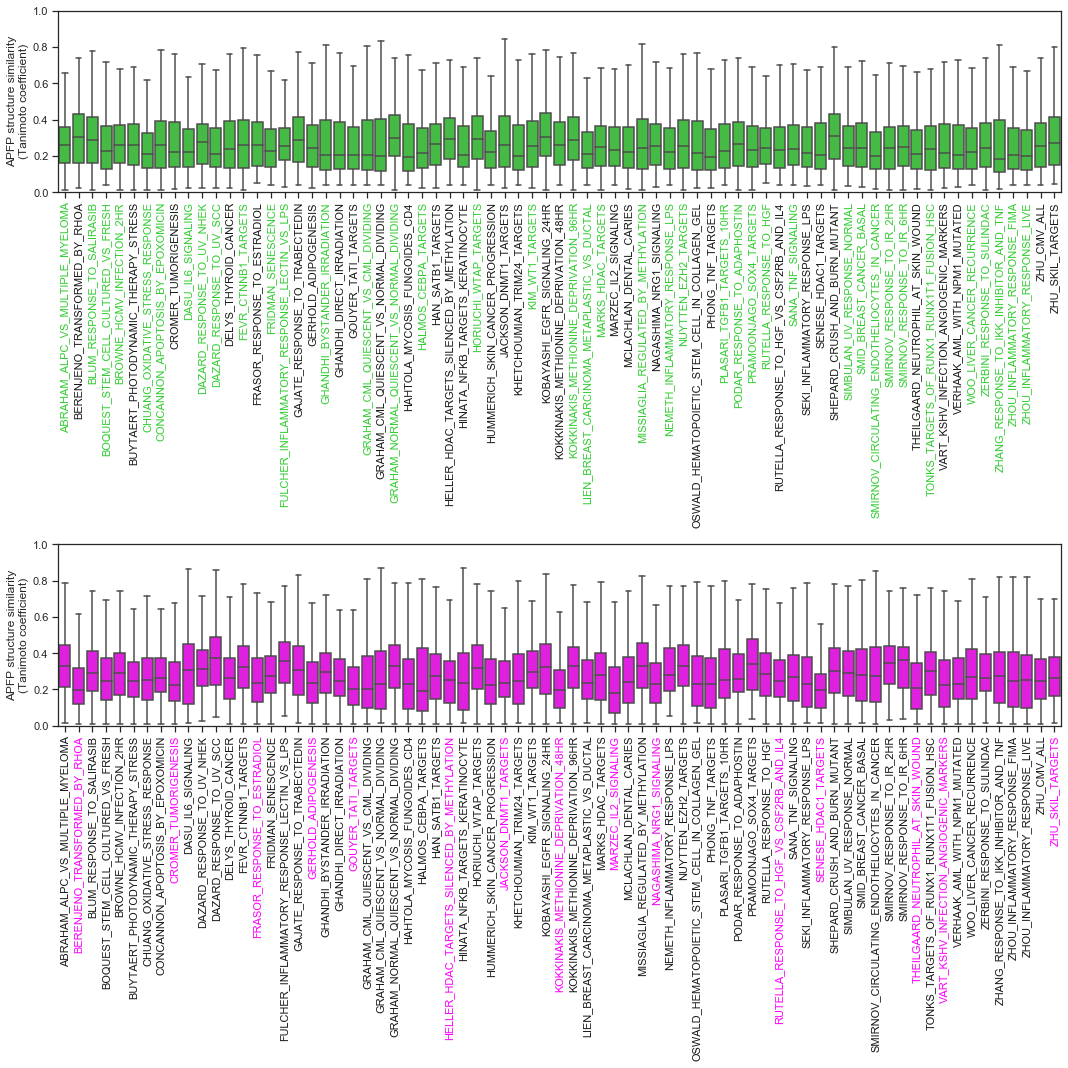

In [237]:
model = 'PACOS_tool_combined_reverse'
QUIZC_top50_tanimoto_dict = get_topN_tanimoto(proj_benchmark_outputs_path, 
                                              benchmark_genesets, 
                                              apfp_Tanimoto_QUIZC_pert_iname, method_name='QUIZ-C', model=model, topN=50)

L1000CDS2_top50_tanimoto_dict = get_topN_tanimoto(proj_intermediary_outputs_path, benchmark_genesets, 
                                                  apfp_Tanimoto_L1000CDS2_pert_iname, method_name='L1000CDS2', model=model, topN=50)


QUIZC_top50_tanimoto_dict_labels, QUIZC_top50_tanimoto_dict_data = [*zip(*QUIZC_top50_tanimoto_dict.items())]
L1000CDS2_top50_tanimoto_dict_labels, L1000CDS2_top50_tanimoto_dict_data = [*zip(*L1000CDS2_top50_tanimoto_dict.items())]

colors1 = []
ctr = 0
for x_QUIZC, x_L1000CDS2 in zip(QUIZC_top50_tanimoto_dict_data,  L1000CDS2_top50_tanimoto_dict_data):
    if ((np.mean(x_QUIZC) - np.mean(x_L1000CDS2) < 0) & (st.mannwhitneyu(x_QUIZC, x_L1000CDS2)[1] <= 0.05)):
        colors1.append('limegreen')
        ctr += 1
    else:
        colors1.append('k')
print(ctr)

colors2 = []
ctr = 0
for x_QUIZC, x_L1000CDS2 in zip(QUIZC_top50_tanimoto_dict_data,  L1000CDS2_top50_tanimoto_dict_data):
    if ((np.mean(x_QUIZC) - np.mean(x_L1000CDS2) > 0) & (st.mannwhitneyu(x_QUIZC, x_L1000CDS2)[1] <= 0.05)):
        colors2.append('magenta')
        ctr += 1
    else:
        colors2.append('k')
print(ctr)

fig = plt.figure()
fig.set_size_inches(15, 15)
sns.set(font_scale=1.0)
with sns.axes_style("ticks"):
    ax1 = plt.subplot(211)
    sns.boxplot(data=QUIZC_top50_tanimoto_dict_data, color='limegreen', showfliers = False)
    for color, tick in zip(colors1, ax1.xaxis.get_major_ticks()):
        tick.label1.set_color(color)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(QUIZC_top50_tanimoto_dict_labels)), QUIZC_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    ax2 = plt.subplot(212)
    sns.boxplot(data=L1000CDS2_top50_tanimoto_dict_data, color='magenta', showfliers = False)
    for color, tick in zip(colors2, ax2.xaxis.get_major_ticks()):
        tick.label1.set_color(color)
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(L1000CDS2_top50_tanimoto_dict_labels)), L1000CDS2_top50_tanimoto_dict_labels)
    plt.ylabel('APFP structure similarity\n(Tanimoto coefficient)')
    
    plt.tight_layout()
    plt.savefig(proj_output_path + 'QUIZC-L1000CDS2_Top50_Tanimoto_%s.pdf' % model, format='pdf')